Coisas pra fazer em ordem de importância:
1. Cross validation para saber se random forest esta dando overffiting
2.   fazer emsembles

Coisas que podemos fazer se der tempo e tiver paciência:
1.   feature selection (tentativa feita e fracassada)
2.   exploratory data analysis robusto
3. usar metodos de anomaly detection

#Importing libraries and analysis

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

#basic libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import plotly.express as px

#dataset splitting
from sklearn.model_selection import train_test_split

#decompositions
!pip install umap-learn
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#modelos
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import tensorflow as tf

#hyperparamter tuning
!pip install parameter-sherpa
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

#metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from keras.callbacks import Callback

#cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, cross_validate

#emsembles
from sklearn.ensemble import StackingClassifier

#balancing
!pip install imbalanced-learn
!pip install imblearn
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

#feature_selection
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

0.8.1


In [2]:
bank_data = pd.read_csv('data.csv')
bank_data.head()

Bankrupt?  ...   Equity to Liability
0          1  ...              0.016469
1          1  ...              0.020794
2          1  ...              0.016474
3          1  ...              0.023982
4          1  ...              0.035490

[5 rows x 96 columns]

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
bank_data.describe()

Bankrupt?  ...   Equity to Liability
count  6819.000000  ...           6819.000000
mean      0.032263  ...              0.047578
std       0.176710  ...              0.050014
min       0.000000  ...              0.000000
25%       0.000000  ...              0.024477
50%       0.000000  ...              0.033798
75%       0.000000  ...              0.052838
max       1.000000  ...              1.000000

[8 rows x 96 columns]

In [5]:
# Checking for duplicates
bank_data.duplicated().sum()

0

In [6]:
print(bank_data['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [7]:
#matriz de correlação (é bem grande, recomendo n rodar)
#fig, ax = plt.subplots(figsize=(75,75))

#sns.heatmap(bank_data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

#Separação treino/teste

In [8]:
x = bank_data.drop('Bankrupt?', axis=1)
y = bank_data['Bankrupt?']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
x_validation, x_test2, y_validation, y_test2 = train_test_split(x_test2, y_test2, test_size = 0.5, random_state = 0)

#PCA 2d

In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

In [ ]:
# array to dataframe
x_pca = pd.DataFrame(data=x_pca[0:,0:], index=[i for i in range(x_pca.shape[0])], columns=['PC'+str(i) for i in range(x_pca.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_pca[' Bankrupt?'] = y

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


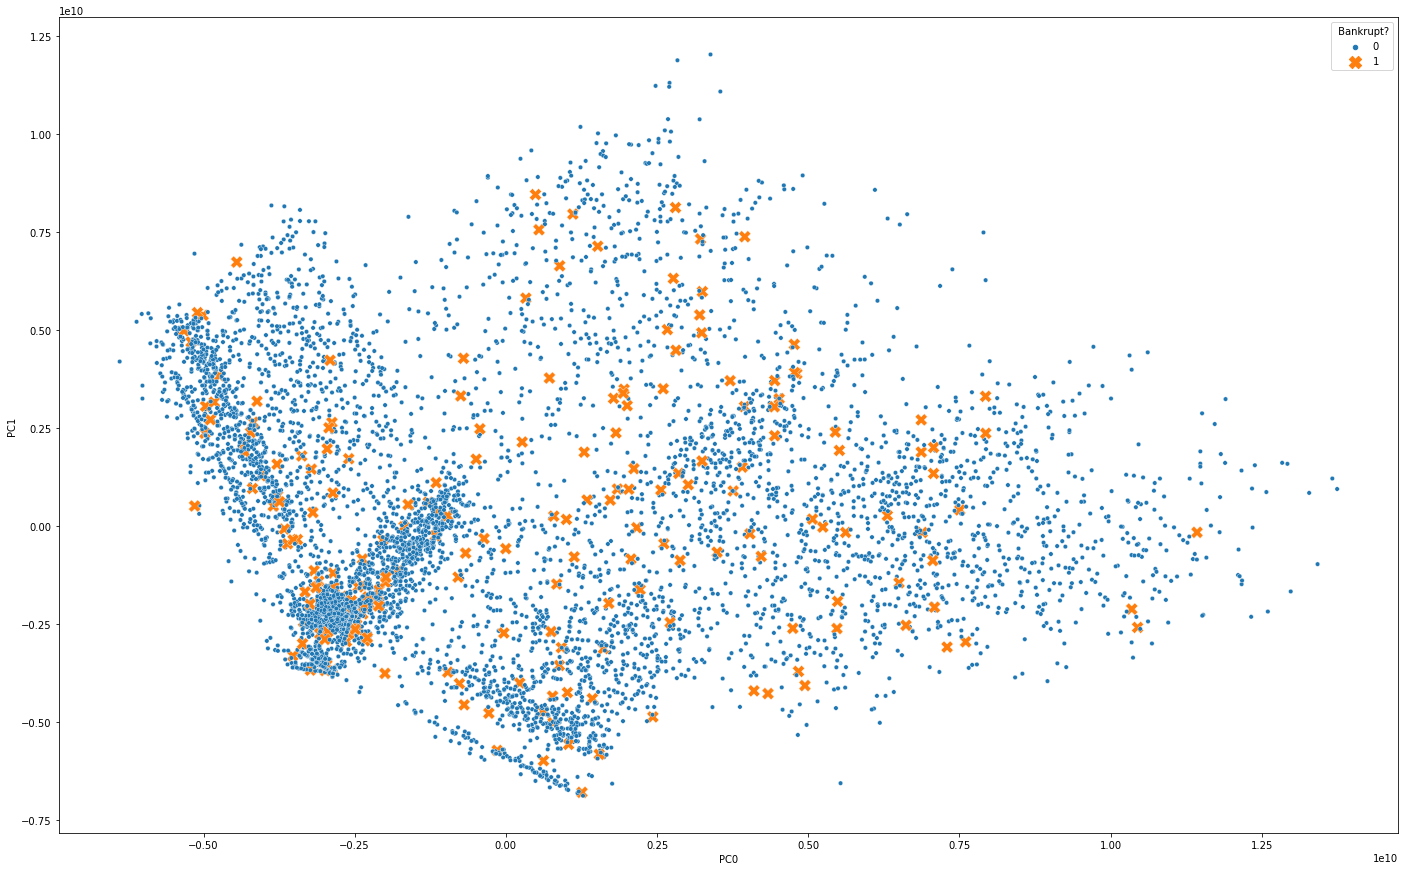

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_pca['PC0'], x_pca['PC1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_pca, size=" Bankrupt?", sizes=(150, 20))

#PCA 3d

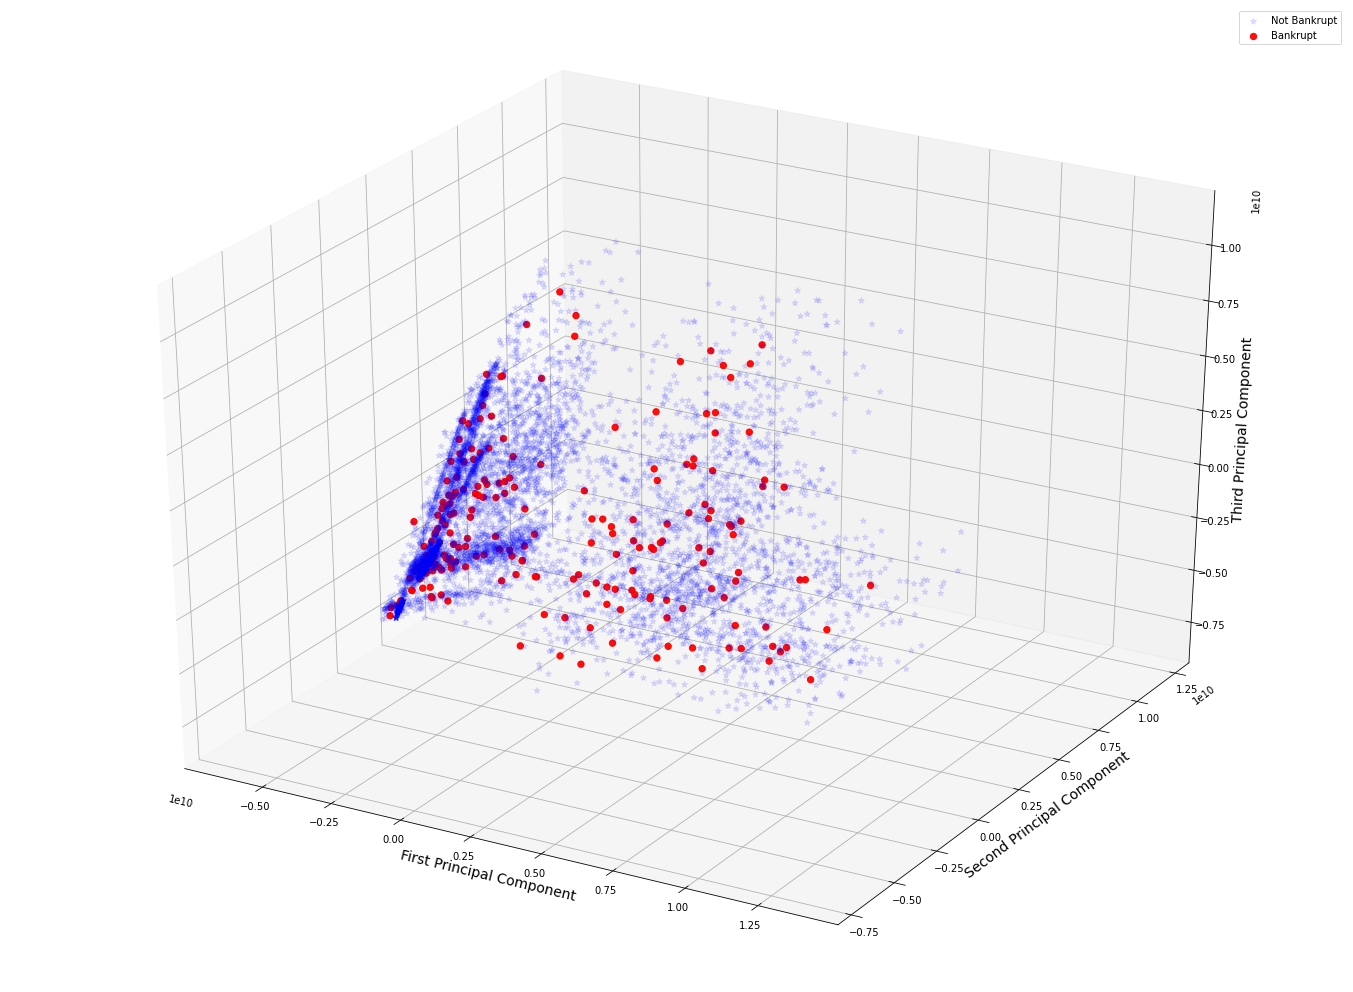

In [ ]:
pca = PCA(n_components=3)
pca.fit(x) 
x_pca = pca.transform(x) 

ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_pca[:,0]
Yax = x_pca[:,1]
Zax = x_pca[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

#TSNE 2d

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6819 samples in 0.002s...
[t-SNE] Computed neighbors for 6819 samples in 1.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6819
[t-SNE] Computed conditional probabilities for sample 2000 / 6819
[t-SNE] Computed conditional probabilities for sample 3000 / 6819
[t-SNE] Computed conditional probabilities for sample 4000 / 6819
[t-SNE] Computed conditional probabilities for sample 5000 / 6819
[t-SNE] Computed conditional probabilities for sample 6000 / 6819
[t-SNE] Computed conditional probabilities for sample 6819 / 6819
[t-SNE] Mean sigma: 4.624504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.117477
[t-SNE] KL divergence after 2000 iterations: 0.811514


In [ ]:
# array to dataframe
x_tsne = pd.DataFrame(data=x_tsne[0:,0:], index=[i for i in range(x_tsne.shape[0])], columns=['TSNE'+str(i) for i in range(x_tsne.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_tsne[' Bankrupt?'] = y

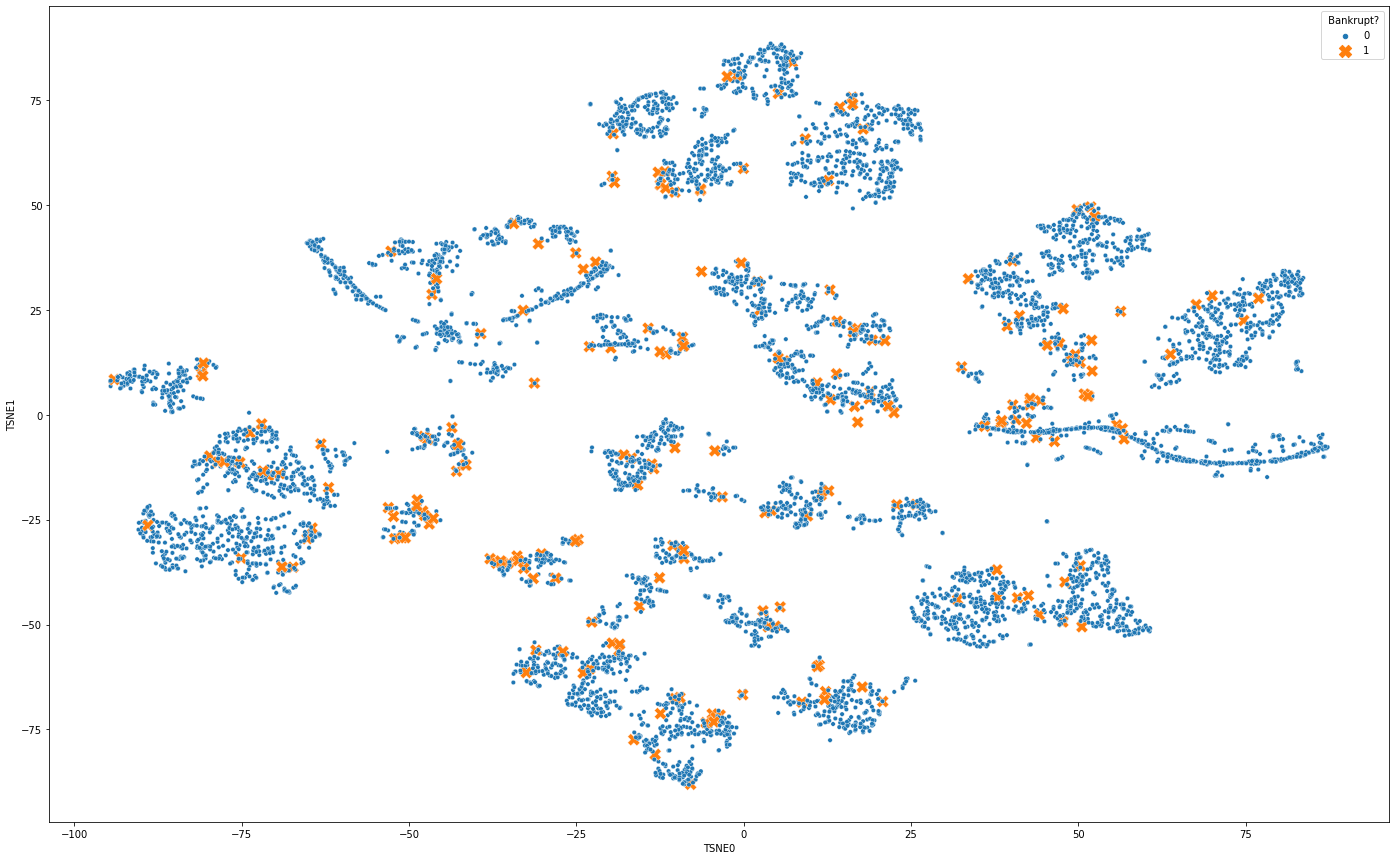

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_tsne['TSNE0'], x_tsne['TSNE1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_tsne, size=" Bankrupt?", sizes=(150, 20))

#TSNE 3d

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6819 samples in 0.001s...
[t-SNE] Computed neighbors for 6819 samples in 1.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6819
[t-SNE] Computed conditional probabilities for sample 2000 / 6819
[t-SNE] Computed conditional probabilities for sample 3000 / 6819
[t-SNE] Computed conditional probabilities for sample 4000 / 6819
[t-SNE] Computed conditional probabilities for sample 5000 / 6819
[t-SNE] Computed conditional probabilities for sample 6000 / 6819
[t-SNE] Computed conditional probabilities for sample 6819 / 6819
[t-SNE] Mean sigma: 4.624504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.626663
[t-SNE] KL divergence after 2000 iterations: 0.696910


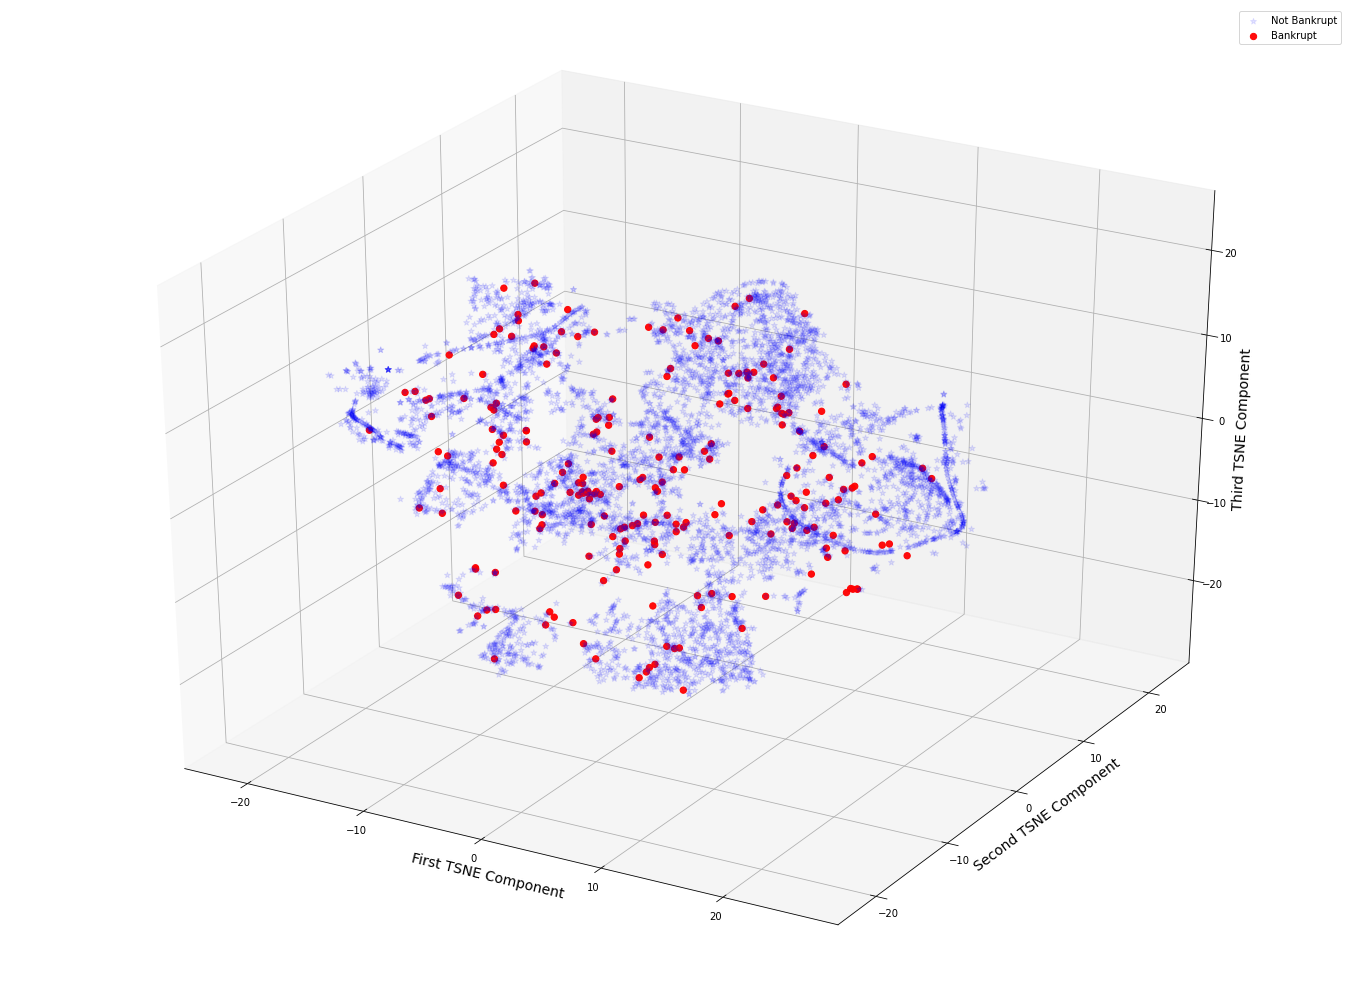

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=2000)
x_tsne = tsne.fit_transform(x)

ex_variance=np.var(x_tsne,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_tsne[:,0]
Yax = x_tsne[:,1]
Zax = x_tsne[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First TSNE Component", fontsize=14)
ax.set_ylabel("Second TSNE Component", fontsize=14)
ax.set_zlabel("Third TSNE Component", fontsize=14)

ax.legend()
plt.show()

#UMAP 2d

In [ ]:
manifold = umap.UMAP().fit(x, y)
x_umap = manifold.transform(x)

In [ ]:
# array to dataframe
x_umap = pd.DataFrame(data=x_umap[0:,0:], index=[i for i in range(x_umap.shape[0])], columns=['UMAP'+str(i) for i in range(x_umap.shape[1])])

In [ ]:
# insert Bankrupt colunm back to x
x_umap[' Bankrupt?'] = y

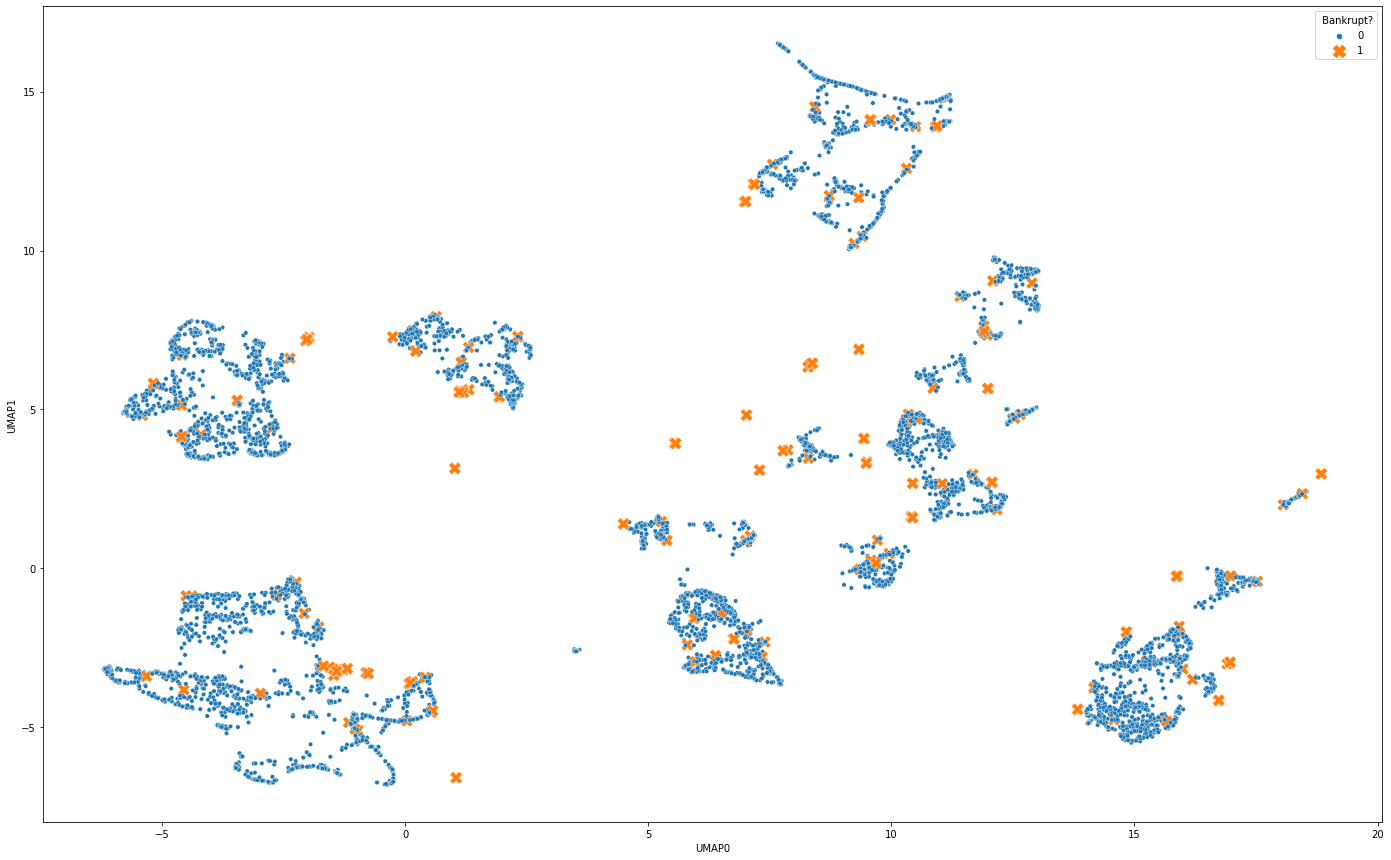

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 15)
sns.scatterplot(x_umap['UMAP0'], x_umap['UMAP1'], hue = ' Bankrupt?', style = ' Bankrupt?', data = x_umap, size=" Bankrupt?", sizes=(150, 20))

#UMAP 3d

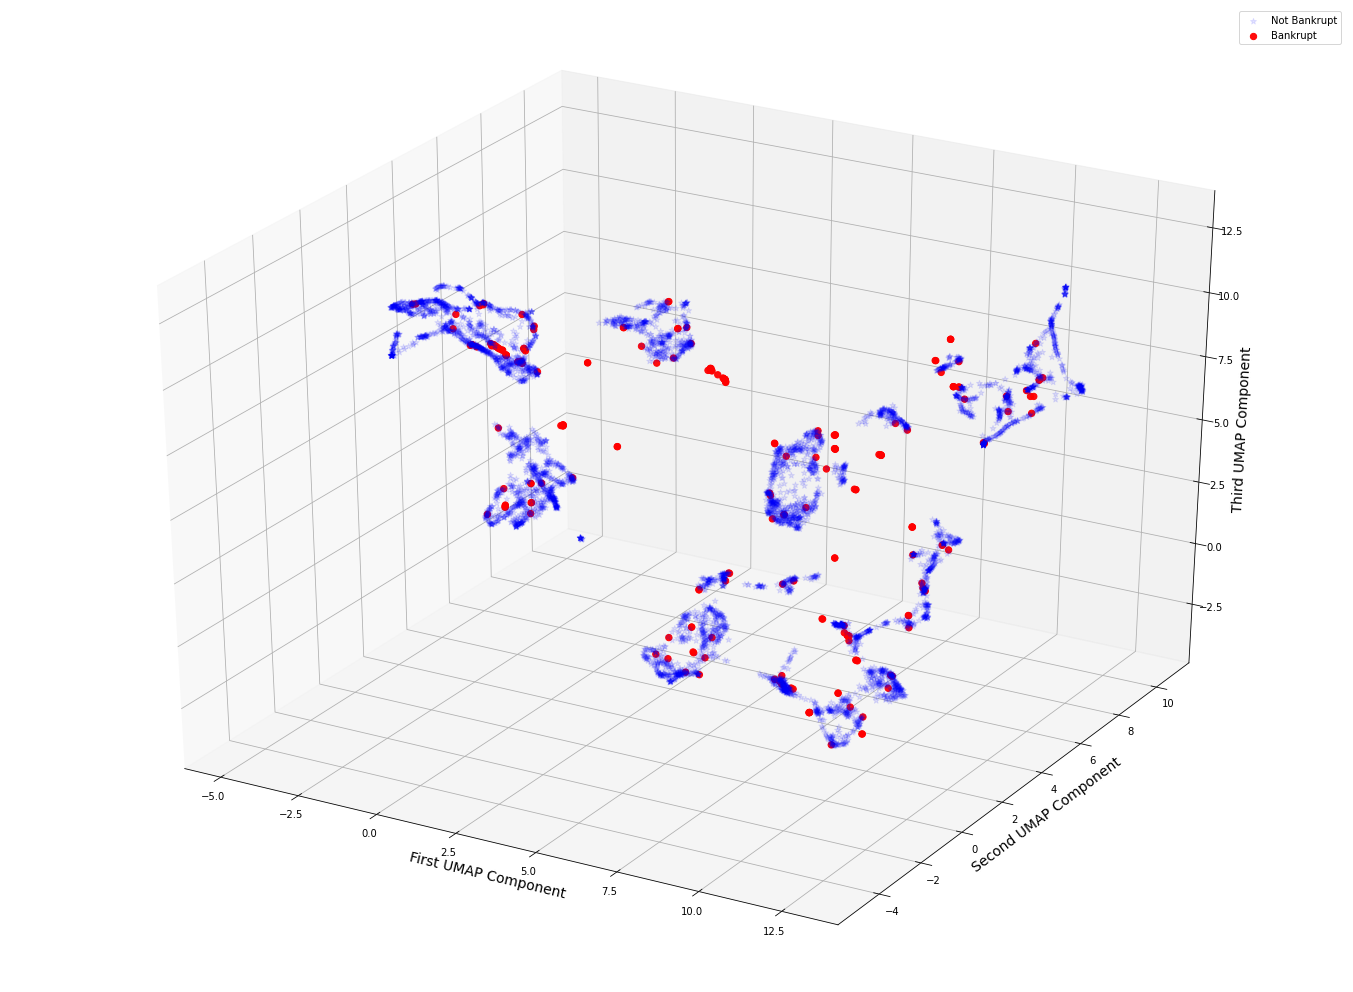

In [ ]:
manifold = umap.UMAP(n_components=3).fit(x, y)
x_umap = manifold.transform(x)

ex_variance=np.var(x_umap,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_umap[:,0]
Yax = x_umap[:,1]
Zax = x_umap[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'Not Bankrupt',1:'Bankrupt'}
marker = {0:'*',1:'o'}
alpha = {0:.1, 1:.95}

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First UMAP Component", fontsize=14)
ax.set_ylabel("Second UMAP Component", fontsize=14)
ax.set_zlabel("Third UMAP Component", fontsize=14)

ax.legend()
plt.show()

#**Para todos (PCA, TSNE e UMAP) utilizar x (x = transform(x)) resulta em scores mais baixos em todos os modelos**

#LogisticRegression

In [12]:
lr = LogisticRegression(random_state=0, max_iter = 100000)

lr.fit(x_train,y_train)
lr_pred_class = lr.predict(x_test)

print(classification_report(y_test, lr_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364



Text(0, 0.5, 'True Positive Rate')

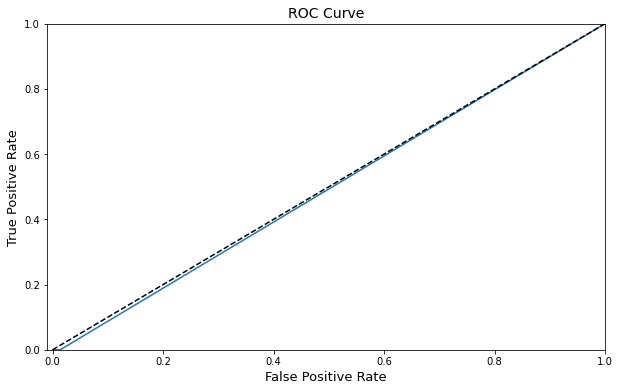

In [13]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

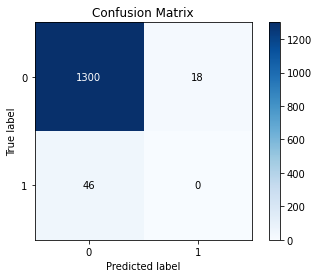

In [14]:
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_pred_class)

#LinearDiscriminantAnalysis

In [15]:
ld = LinearDiscriminantAnalysis()

ld.fit(x_train,y_train)
ld_pred_class = ld.predict(x_test)

print(classification_report(y_test, ld_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1318
           1       0.53      0.35      0.42        46

    accuracy                           0.97      1364
   macro avg       0.76      0.67      0.70      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

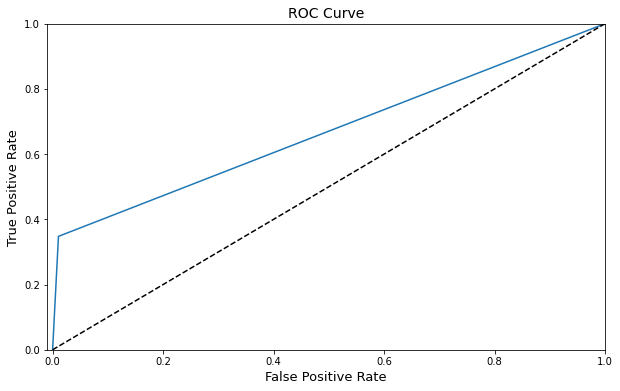

In [16]:
ld_fpr, ld_tpr, ld_thresold = roc_curve(y_test, ld_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_fpr, ld_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

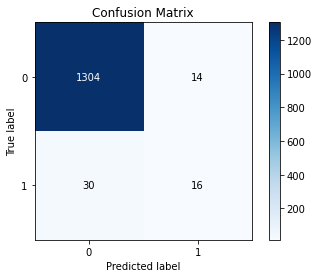

In [17]:
plot = skplt.metrics.plot_confusion_matrix(y_test, ld_pred_class)

#XGBoost

In [18]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
xgb_pred_class = xgb.predict(x_test)

print(classification_report(y_test, xgb_pred_class))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1318
           1       0.72      0.28      0.41        46

    accuracy                           0.97      1364
   macro avg       0.85      0.64      0.70      1364
weighted avg       0.97      0.97      0.97      1364



Text(0, 0.5, 'True Positive Rate')

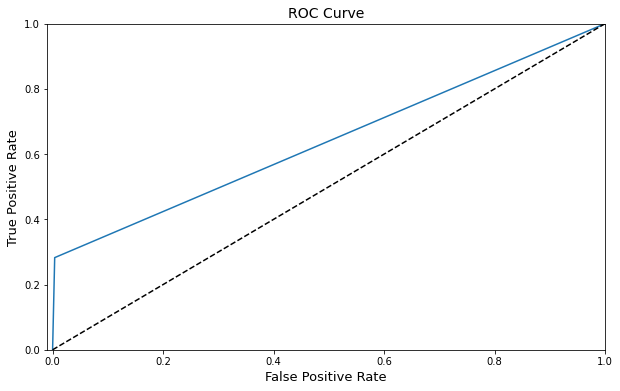

In [19]:
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, xgb_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_fpr, xgb_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

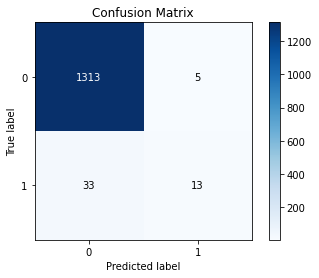

In [20]:
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_class)

#SVM

In [21]:
svc = SVC(kernel = 'rbf')

svc.fit(x_train,y_train)
svc_pred_class = svc.predict(x_test)

print(classification_report(y_test, svc_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

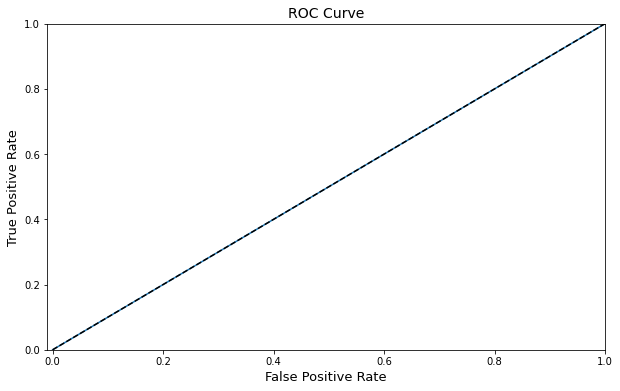

In [22]:
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_test, svc_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_fpr, svc_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

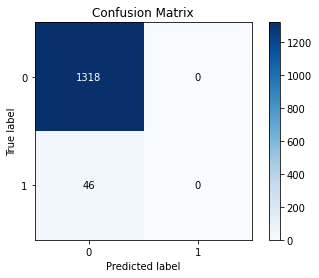

In [23]:
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_pred_class)

#Random Forest

In [24]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
rf_pred_class = rf.predict(x_test)

print(classification_report(y_test, rf_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.61      0.24      0.34        46

    accuracy                           0.97      1364
   macro avg       0.79      0.62      0.66      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

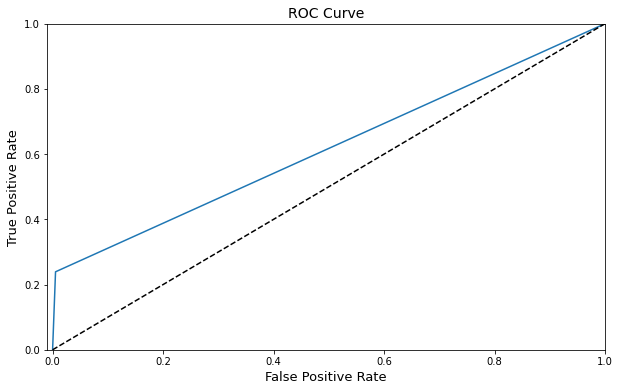

In [25]:
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_test, rf_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

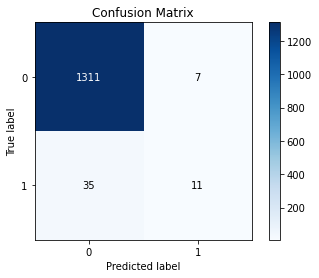

In [26]:
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_pred_class)

#KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)
knn_pred_class = knn.predict(x_test)

print(classification_report(y_test, knn_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

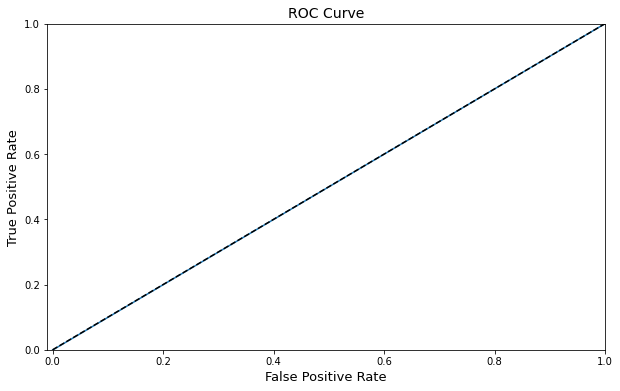

In [28]:
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, knn_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_fpr, knn_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

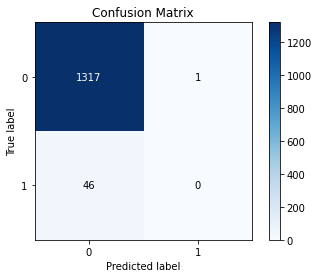

In [29]:
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_pred_class)

# Isolation Forest

In [30]:
bank_data_copy = bank_data

In [31]:
iforest = IsolationForest(n_estimators=500, max_features=20, contamination = 0.032)

pred= iforest.fit_predict(x)
bank_data_copy['scores']=iforest.decision_function(x)
bank_data_copy['anomaly_label']=pred

In [32]:
bank_data_copy['anomaly']=bank_data_copy['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')
fig=px.histogram(bank_data_copy,x='scores',color='anomaly')
fig.show()

In [33]:
idx = np.where((bank_data_copy.anomaly_label==-1) & (bank_data_copy['Bankrupt?'] == 0))
print(len(bank_data_copy.loc[idx]))

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


185


In [34]:
idx = np.where((bank_data_copy.anomaly_label==-1) & (bank_data_copy['Bankrupt?'] == 1))
print(len(bank_data_copy.loc[idx]))

34


#Neural Network

In [35]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

mlp.fit(x_train, y_train)
mlp_pred_class = mlp.predict(x_test)

print(classification_report(y_test, mlp_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.94      1364
   macro avg       0.48      0.49      0.48      1364
weighted avg       0.93      0.94      0.94      1364



Text(0, 0.5, 'True Positive Rate')

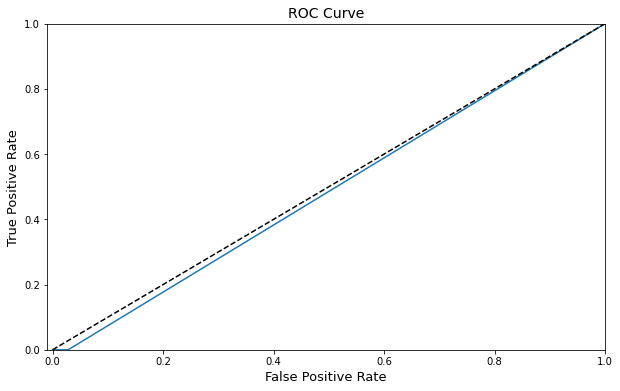

In [36]:
mlp_fpr, mlp_tpr, mlp_thresold = roc_curve(y_test, mlp_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_fpr, mlp_tpr, label='MLP Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

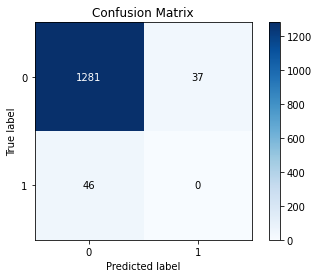

In [37]:
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_pred_class)

# Logistic Regression tuning with sherpa

In [38]:
# Mais correto comentado porque a implementacao seria mais chatinha
# parameters_log_reg = [sherpa.Continuous('C', [1, 0.0001]),
#                       sherpa.Choice('penalty', ['l1', 'l2', 'elasticnet', 'none']),
#                       sherpa.Choice('solver', ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'])]

parameters_log_reg = [sherpa.Continuous('C', [1, 0.0001]),
                      sherpa.Choice('penalty', ['l2', 'none'])]

algorithm_log_reg = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [39]:
study_log_reg = sherpa.Study(parameters=parameters_log_reg,
                             algorithm=algorithm_log_reg,
                             lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8880 if on a cluster or
http://localhost:8880 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [40]:
for trial in study_log_reg:
  print("Trial ", trial.id, " with parameters ", trial.parameters)
  log_reg = LogisticRegression(penalty=trial.parameters['penalty'],
                               C=trial.parameters['C'])
  log_reg.fit(x_train2, y_train2)
  log_reg_pred = log_reg.predict(x_test2)
  log_reg_f1 = f1_score(y_test2, log_reg_pred)
  print("F1 Score: ", log_reg_f1)

  study_log_reg.add_observation(trial, log_reg_f1)
  study_log_reg.finalize(trial)
print(study_log_reg.get_best_result())

Trial  1  with parameters  {'C': 0.04146768857477845, 'penalty': 'l2'}
F1 Score:  0.0
Trial  2  with parameters  {'C': 0.8245873913347694, 'penalty': 'l2'}
F1 Score:  0.0
Trial  3  with parameters  {'C': 0.18023588140404845, 'penalty': 'l2'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 Score:  0.0
Trial  4  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  5  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  6  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  7  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  8  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  9  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  10  with parameters  {'C': 1.0, 'penalty': 'none'}
F1 Score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'C': 0.04146768857477845, 'penalty': 'l2', 'Objective': 0.0}


#Linear Discriminant Analysis tuning with sherpa

In [41]:
# Mais correto comentado porque a implementacao seria mais chatinha
# parameters_lda = [sherpa.Choice('solver', ['svd', 'lsqr', 'eigen']),
#                   sherpa.Choice('shrinkage', ['auto', 'none', 'float']),
#                   sherpa.Continuous('shrinkage_value', [0, 1]),
#                   sherpa.Discrete('n_components', [0, bank_data.shape()[1]])]

parameters_lda = [sherpa.Choice('solver', ['svd', 'lsqr'])]

algorithm_lda = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [42]:
study_lda = sherpa.Study(parameters=parameters_lda,
                             algorithm=algorithm_lda,
                             lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8881 if on a cluster or
http://localhost:8881 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [43]:
for trial in study_lda:
  print("Trial ", trial.id, " with parameters ", trial.parameters)
  lda = LinearDiscriminantAnalysis(solver=trial.parameters['solver'])
  lda.fit(x_train2, y_train2)
  lda_pred = lda.predict(x_test2)
  lda_f1 = f1_score(y_test2, lda_pred)
  print("F1 Score: ", lda_f1)

  study_lda.add_observation(trial, lda_f1)
  study_lda.finalize(trial)
print(study_lda.get_best_result())

Trial  1  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246
Trial  2  with parameters  {'solver': 'lsqr'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  3  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  4  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  5  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  6  with parameters  {'solver': 'lsqr'}
F1 Score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  7  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  8  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  9  with parameters  {'solver': 'svd'}
F1 Score:  0.24242424242424246


Trial  10  with parameters  {'solver': 'lsqr'}
F1 Score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'solver': 'svd', 'Objective': 0.24242424242424246}


#XGBoost tuning with sherpa

In [44]:
parameters_xgb = [sherpa.Continuous('learning_rate', [0.01, 0.1]),
              sherpa.Discrete('max_depth', [3, 10]),
              sherpa.Discrete('min_child_weight', [1, 5]),
              sherpa.Continuous('subsample', [0.5, 0.7]),
              sherpa.Continuous('colsample_bytree', [0.5, 0.7]),
              sherpa.Discrete('n_estimators', [100, 500])]

algorithm_xgb = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [45]:
study_xgb = sherpa.Study(parameters=parameters_xgb,
                     algorithm=algorithm_xgb,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8882 if on a cluster or
http://localhost:8882 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [46]:
for trial in study_xgb:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    xgb = XGBClassifier(learning_rate=trial.parameters['learning_rate'],
                                 max_depth=int(trial.parameters['max_depth']),
                                 min_child_weight=int(trial.parameters['min_child_weight']),
                                 subsample=trial.parameters['subsample'],
                                 colsample_bytree=trial.parameters['colsample_bytree'],
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 objective= 'reg:squarederror')
    xgb.fit(x_train2, y_train2)
    xgb_pred_class = xgb.predict(x_test2)

    xgb_f1 = f1_score(y_test2, xgb_pred_class)

    print("F1 score: ", xgb_f1)
    study_xgb.add_observation(trial, iteration=1, objective=xgb_f1)
    study_xgb.finalize(trial)
print(study_xgb.get_best_result())




Trial  1  with parameters  {'learning_rate': 0.09498117064517717, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.5530447251543342, 'colsample_bytree': 0.6233612922425695, 'n_estimators': 494}
F1 score:  0.2222222222222222
Trial  2  with parameters  {'learning_rate': 0.08938777998406208, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.6491211940704369, 'colsample_bytree': 0.6613395360170096, 'n_estimators': 165}
F1 score:  0.24242424242424246
Trial  3  with parameters  {'learning_rate': 0.04958490674530066, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.6918644840492563, 'colsample_bytree': 0.5596644846976111, 'n_estimators': 428}
F1 score:  0.13793103448275865
Trial  4  with parameters  {'learning_rate': 0.08718789192295125, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5679105986846118, 'colsample_bytree': 0.5092762428294942, 'n_estimators': 163}
F1 score:  0.19354838709677416
Trial  5  with parameters  {'learning_rate': 0.08098752639386222, 'max_depth': 4,

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.19354838709677416
Trial  8  with parameters  {'learning_rate': 0.08098769114115112, 'max_depth': 4.0, 'min_child_weight': 4.0, 'subsample': 0.5534598385373612, 'colsample_bytree': 0.6431765416046346, 'n_estimators': 154.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.3225806451612903
Trial  9  with parameters  {'learning_rate': 0.08099452392842761, 'max_depth': 4.0, 'min_child_weight': 4.0, 'subsample': 0.553427113023198, 'colsample_bytree': 0.6431857647665348, 'n_estimators': 154.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.3333333333333333
Trial  10  with parameters  {'learning_rate': 0.0810691345840152, 'max_depth': 4.0, 'min_child_weight': 4.0, 'subsample': 0.5530739797750148, 'colsample_bytree': 0.6433238681777609, 'n_estimators': 154.0}
F1 score:  0.25806451612903225
{'Trial-ID': 9, 'Iteration': 1, 'colsample_bytree': 0.6431857647665348, 'learning_rate': 0.08099452392842761, 'max_depth': 4.0, 'min_child_weight': 4.0, 'n_estimators': 154.0, 'subsample': 0.553427113023198, 'Objective': 0.3333333333333333}


#SVM tuning with sherpa

In [47]:
parameters_svc = [sherpa.Continuous('C', [0.1, 1000]),
              sherpa.Continuous('gamma', [1, 0.0001]),
              sherpa.Choice('class_weight', ['balanced', None])]

algorithm_svc = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [48]:
study_svc = sherpa.Study(parameters=parameters_svc,
                     algorithm=algorithm_svc,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8883 if on a cluster or
http://localhost:8883 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [49]:
for trial in study_svc:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    svc = SVC(C=trial.parameters['C'],
                                 gamma=trial.parameters['gamma'],
                                 kernel = 'rbf',
                                 class_weight=trial.parameters['class_weight'])
    svc.fit(x_train2, y_train2)
    svc_pred_class = svc.predict(x_test2)

    svc_f1 = f1_score(y_test2, svc_pred_class)

    print("F1 score: ", svc_f1)
    study_svc.add_observation(trial, iteration=1, objective=svc_f1)
    study_svc.finalize(trial)
print(study_svc.get_best_result())




Trial  1  with parameters  {'C': 905.9506806004343, 'gamma': 0.4906653969844138, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  2  with parameters  {'C': 210.02316676689364, 'gamma': 0.48906524360085624, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  3  with parameters  {'C': 861.7514813175754, 'gamma': 0.5474305425775692, 'class_weight': 'balanced'}
F1 score:  0.0
Trial  4  with parameters  {'C': 705.3827414607978, 'gamma': 0.6932479191461227, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  5  with parameters  {'C': 126.4792459495373, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  6  with parameters  {'C': 663.9672405603288, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  7  with parameters  {'C': 563.1729393980986, 'gamma': 1.0, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  8  with parameters  {'C': 624.1380327172603, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  9  with parameters  {'C': 772.2720868246026, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  10  with parameters  {'C': 771.2393564069154, 'gamma': 1.0, 'class_weight': 'balanced'}
F1 score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'C': 905.9506806004343, 'class_weight': 'balanced', 'gamma': 0.4906653969844138, 'Objective': 0.0}


#Random Forest tuning with sherpa

In [50]:
parameters_rf = [sherpa.Discrete('max_depth', [10, 100]),
              sherpa.Choice('max_features', ['auto', 'sqrt']),
              sherpa.Discrete('min_samples_leaf', [1, 4]),
              sherpa.Discrete('min_samples_split', [2, 10]),
              sherpa.Discrete('n_estimators', [200, 2000]),
              sherpa.Choice('class_weight', ['balanced', None]),
              sherpa.Choice('criterion', ['gini', 'entropy'])]

algorithm_rf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [51]:
study_rf = sherpa.Study(parameters=parameters_rf,
                     algorithm=algorithm_rf,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8884 if on a cluster or
http://localhost:8884 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [52]:
for trial in study_rf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    rf = RandomForestClassifier(max_depth=int(trial.parameters['max_depth']),
                                 max_features=trial.parameters['max_features'],
                                 min_samples_leaf=int(trial.parameters['min_samples_leaf']),
                                 min_samples_split=int(trial.parameters['min_samples_split']),
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 class_weight=trial.parameters['class_weight'],
                                 criterion=trial.parameters['criterion'])
    
    rf.fit(x_train2, y_train2)
    rf_pred_class = rf.predict(x_test2)

    rf_f1 = f1_score(y_test2, rf_pred_class)

    print("F1 score: ", rf_f1)
    study_rf.add_observation(trial, iteration=1, objective=rf_f1)
    study_rf.finalize(trial)
print(study_rf.get_best_result())




Trial  1  with parameters  {'max_depth': 63, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1702, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.16000000000000003
Trial  2  with parameters  {'max_depth': 28, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1864, 'class_weight': None, 'criterion': 'gini'}
F1 score:  0.15384615384615383
Trial  3  with parameters  {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1346, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.2758620689655173
Trial  4  with parameters  {'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.29629629629629634
Trial  5  with parameters  {'max_depth': 65, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 944, '

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.23076923076923075
Trial  9  with parameters  {'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'class_weight': 'balanced', 'criterion': 'entropy'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.29629629629629634
Trial  10  with parameters  {'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.29629629629629634
{'Trial-ID': 4, 'Iteration': 1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1666, 'Objective': 0.29629629629629634}


#KNN tuning with sherpa

In [53]:
parameters_knn = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute']),
              sherpa.Choice('weights', ['uniform', 'distance'])]

algorithm_knn = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [54]:
study_knn = sherpa.Study(parameters=parameters_knn,
                     algorithm=algorithm_knn,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8885 if on a cluster or
http://localhost:8885 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [55]:
for trial in study_knn:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
                                 leaf_size=int(trial.parameters['leaf_size']),
                                 algorithm=trial.parameters['algorithm'],
                                 weights=trial.parameters['weights'])
    knn.fit(x_train2, y_train2)
    knn_pred_class = knn.predict(x_test2)

    knn_f1 = f1_score(y_test2, knn_pred_class)

    print("F1 score: ", knn_f1)
    study_knn.add_observation(trial, iteration=1, objective=knn_f1)
    study_knn.finalize(trial)
print(study_knn.get_best_result())




Trial  1  with parameters  {'n_neighbors': 8, 'leaf_size': 39, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  2  with parameters  {'n_neighbors': 10, 'leaf_size': 48, 'algorithm': 'brute', 'weights': 'distance'}
F1 score:  0.0
Trial  3  with parameters  {'n_neighbors': 12, 'leaf_size': 41, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  4  with parameters  {'n_neighbors': 12, 'leaf_size': 48, 'algorithm': 'ball_tree', 'weights': 'distance'}
F1 score:  0.0
Trial  5  with parameters  {'n_neighbors': 4, 'leaf_size': 28, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.0


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Trial  6  with parameters  {'n_neighbors': 10, 'leaf_size': 23, 'algorithm': 'brute', 'weights': 'uniform'}
F1 score:  0.0
Trial  7  with parameters  {'n_neighbors': 11, 'leaf_size': 28, 'algorithm': 'ball_tree', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  8  with parameters  {'n_neighbors': 13, 'leaf_size': 36, 'algorithm': 'ball_tree', 'weights': 'uniform'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  9  with parameters  {'n_neighbors': 11, 'leaf_size': 44, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  10  with parameters  {'n_neighbors': 11, 'leaf_size': 45, 'algorithm': 'brute', 'weights': 'distance'}
F1 score:  0.0
{'Trial-ID': 1, 'Iteration': 1, 'algorithm': 'ball_tree', 'leaf_size': 39, 'n_neighbors': 8, 'weights': 'distance', 'Objective': 0.0}


#Neural Network tuning with sherpa

In [56]:
parameters_mlp = [sherpa.Discrete('hidden_layer_sizes', [20, 200]),
                  sherpa.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
                  sherpa.Choice('solver', ['lbfgs', 'sgd', 'adam']),
                  sherpa.Continuous('alpha', [0.00001, 0.25]),
                  sherpa.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
                  sherpa.Continuous('learning_rate_init', [0.0001, 0.25]),
                  sherpa.Discrete('max_iter', [1, 400]),
                  sherpa.Choice('shuffle', [True, False]),
                  sherpa.Continuous('momentum', [0.9, 0.01])]

algorithm_mlp = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [57]:
study_mlp = sherpa.Study(parameters=parameters_mlp,
                     algorithm=algorithm_mlp,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8886 if on a cluster or
http://localhost:8886 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [58]:
for trial in study_mlp:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    mlp = MLPClassifier(hidden_layer_sizes=(int(trial.parameters['hidden_layer_sizes'])),
                        activation=trial.parameters['activation'],
                        solver=trial.parameters['solver'],
                        alpha=trial.parameters['alpha'],
                        learning_rate=trial.parameters['learning_rate'],
                        learning_rate_init=trial.parameters['learning_rate_init'],
                        max_iter=trial.parameters['max_iter'],
                        shuffle=trial.parameters['shuffle'],
                        momentum=trial.parameters['momentum'])
    mlp.fit(x_train2, y_train2)
    mlp_pred_class = mlp.predict(x_test2)

    mlp_f1 = f1_score(y_test2, mlp_pred_class)

    print("F1 score: ", mlp_f1)
    study_mlp.add_observation(trial, iteration=1, objective=mlp_f1)
    study_mlp.finalize(trial)
print(study_mlp.get_best_result())

Trial  1  with parameters  {'hidden_layer_sizes': 91, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.1239198968164447, 'learning_rate': 'constant', 'learning_rate_init': 0.22071872236617898, 'max_iter': 289, 'shuffle': False, 'momentum': 0.32269273665782583}
F1 score:  0.021164021164021163
Trial  2  with parameters  {'hidden_layer_sizes': 150, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.18963659983558503, 'learning_rate': 'invscaling', 'learning_rate_init': 0.22096229388146854, 'max_iter': 195, 'shuffle': False, 'momentum': 0.6206733590716018}
F1 score:  0.0
Trial  3  with parameters  {'hidden_layer_sizes': 57, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.17241667365075405, 'learning_rate': 'constant', 'learning_rate_init': 0.1825977813066077, 'max_iter': 171, 'shuffle': False, 'momentum': 0.8829846092707448}
F1 score:  0.044444444444444446
Trial  4  with parameters  {'hidden_layer_sizes': 195, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.19604916509213

#Isolation Forest tuning with Sherpa

In [ ]:
parameters_isf = [sherpa.Discrete('n_estimators', [10, 1000]),
                 sherpa.Discrete('n_jobs', [1, 10]),
                 sherpa.Continuous('max_features', [1, 10]),
                 sherpa.Choice('bootstrap', [True, False]),
                 sherpa.Discrete('random_state', [0, 10]),
                 sherpa.Choice('warm_start', [True, False]),
                 sherpa.Continuous('contamination', [0, 1])]

algorithm_isf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [ ]:
study_isf = sherpa.Study(parameters=parameters_isf,
                     algorithm=algorithm_isf,
                     lower_is_better=False)

In [ ]:
for trial in study_isf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    isf = IsolationForest(n_estimators=int(trial.parameters['n_estimators']),
                          bootstrap=trial.parameters['bootstrap'],
                          n_jobs=int(trial.parameters['n_jobs']),
                          random_state=int(trial.parameters['random_state']),
                          warm_start=trial.parameters['warm_start'],
                          contamination=trial.parameters['contamination'])
    
    #Codar essa parte é um pouco mais complicada porque o ISF não é codado como
    #os demais algoritmos desse exercício
print(study_isf.get_best_result())

#Balancing data: Oversampling with SMOTE

In [59]:
oversample = SMOTE()
x_oversampled, y_oversampled = oversample.fit_resample(x, y)
x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(x_oversampled, y_oversampled, test_size = 0.2, random_state = 0)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_oversampled))

Original dataset shape Counter({0: 6599, 1: 220})
Resampled dataset shape Counter({1: 6599, 0: 6599})


In [60]:
x_train_oversampled2, x_test_oversampled2, y_train_oversampled2, y_test_oversampled2 = train_test_split(x_oversampled, y_oversampled, test_size = 0.2, random_state = 0)

In [61]:
x_validation_oversampled, x_test_oversampled2, y_validation_oversampled, y_test_oversampled2 = train_test_split(x_test_oversampled2, y_test_oversampled2, test_size = 0.5, random_state = 0)

#LogisticRegression oversampled

In [62]:
lr_oversampled = LogisticRegression(random_state=0, max_iter = 100000)

lr_oversampled.fit(x_train_oversampled,y_train_oversampled)
lr_oversampled_pred_class = lr_oversampled.predict(x_test_oversampled)
lr_oversampled_pred_class_original = lr_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, lr_oversampled_pred_class))
print(classification_report(y_test, lr_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.56      0.77      0.65      1269
           1       0.67      0.44      0.53      1371

    accuracy                           0.60      2640
   macro avg       0.61      0.60      0.59      2640
weighted avg       0.62      0.60      0.59      2640

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1318
           1       0.06      0.43      0.10        46

    accuracy                           0.74      1364
   macro avg       0.52      0.59      0.48      1364
weighted avg       0.94      0.74      0.82      1364



Text(0, 0.5, 'True Positive Rate')

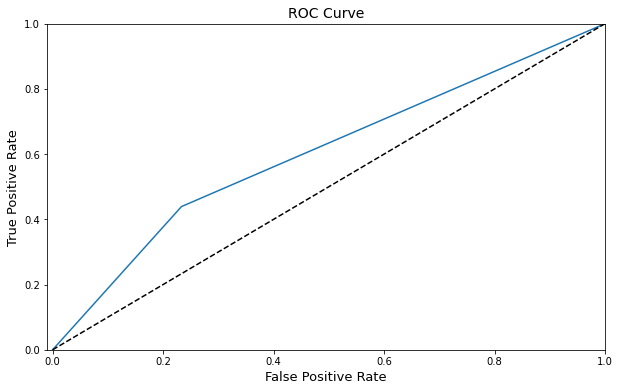

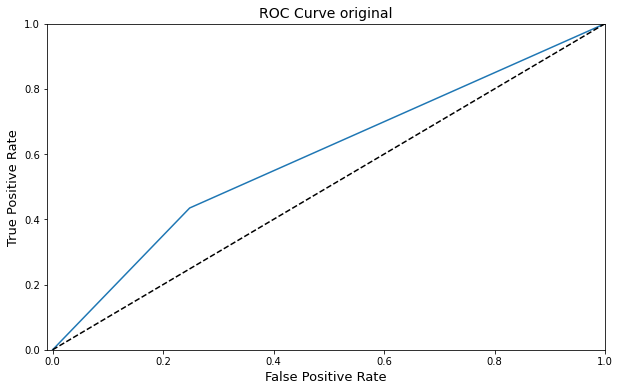

In [63]:
log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test_oversampled, lr_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, lr_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test, lr_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve original', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

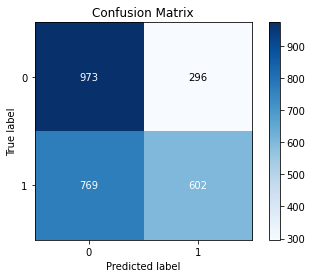

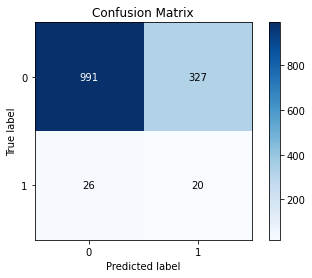

In [64]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, lr_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_oversampled_pred_class_original)

#LinearDiscriminantAnalysis oversampled

In [79]:
ld_oversampled = LinearDiscriminantAnalysis()

ld_oversampled.fit(x_train_oversampled,y_train_oversampled)
ld_oversampled_pred_class = ld_oversampled.predict(x_test_oversampled)
ld_oversampled_pred_class_original = ld_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, ld_oversampled_pred_class))
print(classification_report(y_test, ld_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1269
           1       0.89      0.92      0.90      1371

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1318
           1       0.22      0.87      0.35        46

    accuracy                           0.89      1364
   macro avg       0.61      0.88      0.65      1364
weighted avg       0.97      0.89      0.92      1364



Text(0, 0.5, 'True Positive Rate')

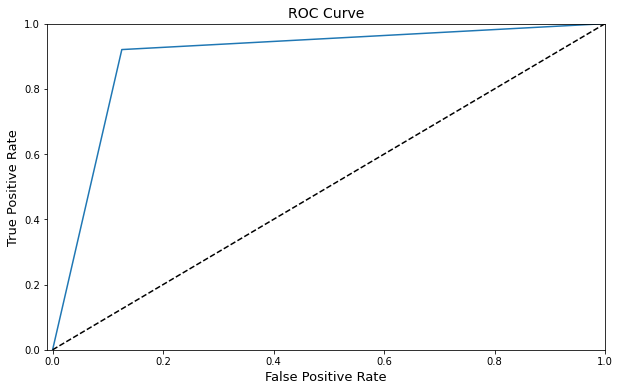

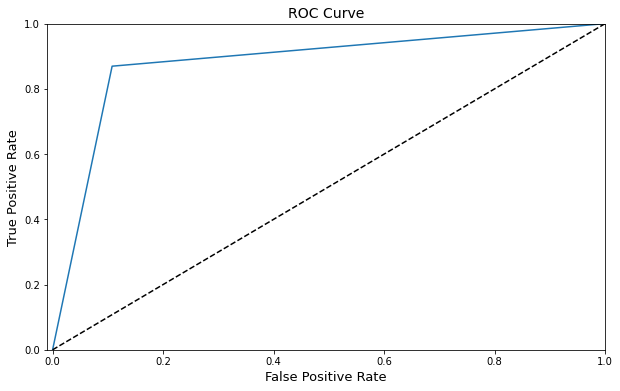

In [80]:
ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test_oversampled, ld_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, ld_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test, ld_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

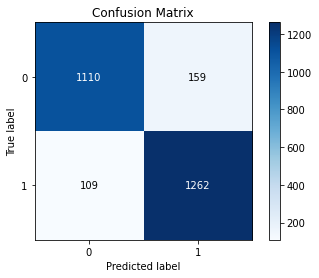

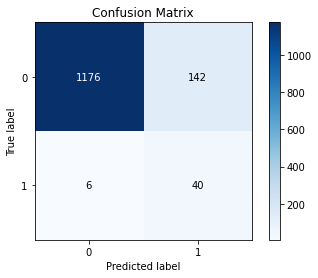

In [81]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, ld_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, ld_oversampled_pred_class_original)

#XGBoost oversampled

In [82]:
xgb_oversampled = XGBClassifier()

xgb_oversampled.fit(x_train_oversampled,y_train_oversampled)
xgb_oversampled_pred_class = xgb_oversampled.predict(x_test_oversampled)
xgb_oversampled_pred_class_original = xgb_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, xgb_oversampled_pred_class))
print(classification_report(y_test, xgb_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1269
           1       0.95      0.98      0.97      1371

    accuracy                           0.97      2640
   macro avg       0.97      0.96      0.97      2640
weighted avg       0.97      0.97      0.97      2640

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1318
           1       0.45      0.93      0.61        46

    accuracy                           0.96      1364
   macro avg       0.73      0.95      0.79      1364
weighted avg       0.98      0.96      0.97      1364



Text(0, 0.5, 'True Positive Rate')

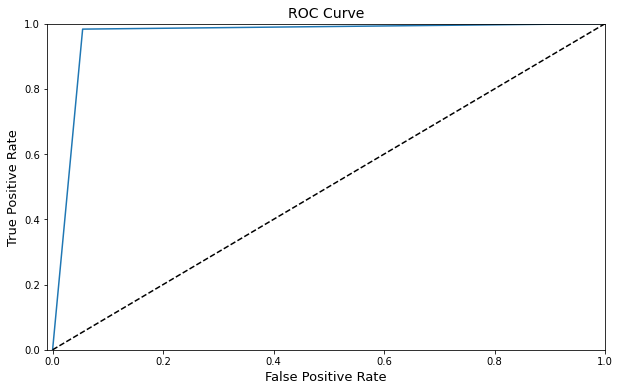

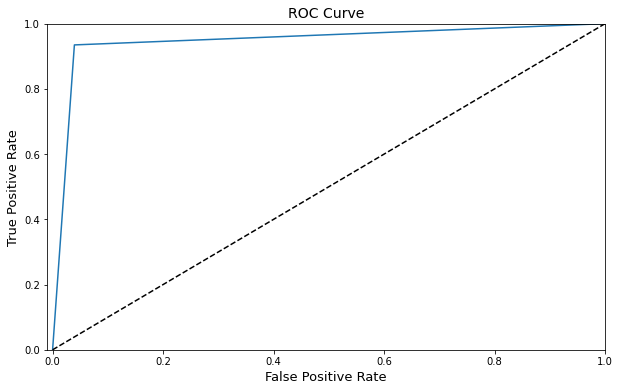

In [83]:
xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test_oversampled, xgb_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, xgb_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test, xgb_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

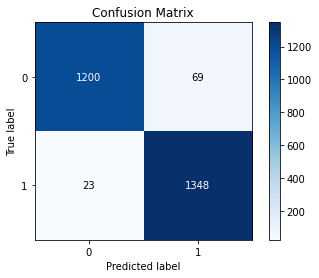

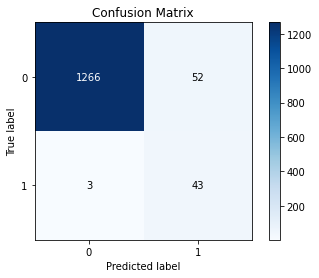

In [84]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, xgb_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_oversampled_pred_class_original)

#SVM oversampled

In [85]:
svc_oversampled = SVC(kernel = 'rbf')

svc_oversampled.fit(x_train_oversampled,y_train_oversampled)
svc_oversampled_pred_class = svc_oversampled.predict(x_test_oversampled)
svc_oversampled_pred_class_original = svc_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, svc_oversampled_pred_class))
print(classification_report(y_test, svc_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1269
           1       0.81      0.87      0.84      1371

    accuracy                           0.83      2640
   macro avg       0.83      0.82      0.83      2640
weighted avg       0.83      0.83      0.83      2640

              precision    recall  f1-score   support

           0       0.99      0.78      0.88      1318
           1       0.12      0.83      0.21        46

    accuracy                           0.78      1364
   macro avg       0.55      0.80      0.54      1364
weighted avg       0.96      0.78      0.85      1364



Text(0, 0.5, 'True Positive Rate')

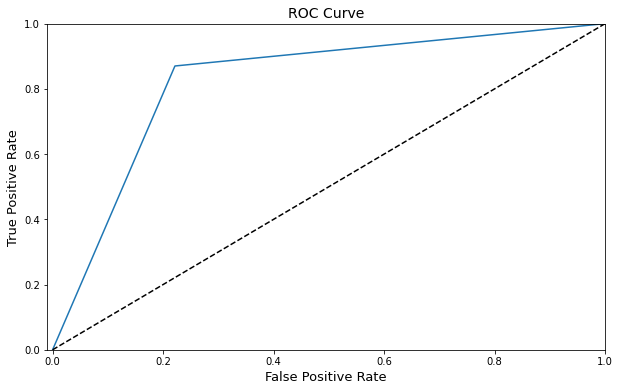

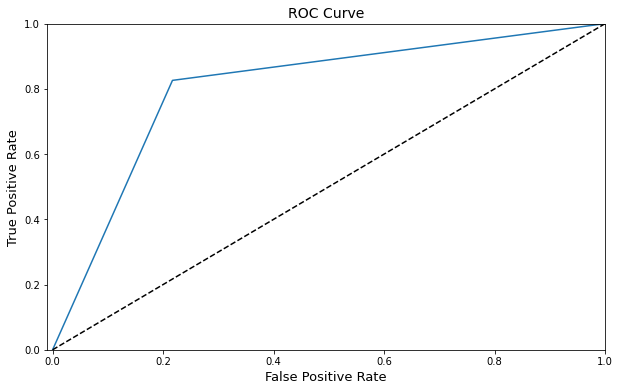

In [86]:
svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test_oversampled, svc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, svc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test, svc_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

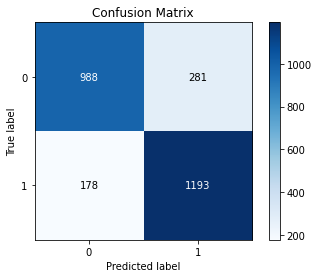

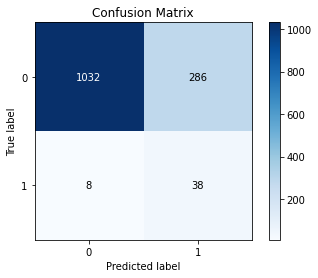

In [87]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, svc_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_oversampled_pred_class_original)

#Random Forest oversampled

In [88]:
rf_oversampled = RandomForestClassifier()

rf_oversampled.fit(x_train_oversampled,y_train_oversampled)
rf_oversampled_pred_class = rf_oversampled.predict(x_test_oversampled)
rf_oversampled_pred_class_original = rf_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, rf_oversampled_pred_class))
print(classification_report(y_test, rf_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1269
           1       0.97      1.00      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       0.90      1.00      0.95        46

    accuracy                           1.00      1364
   macro avg       0.95      1.00      0.97      1364
weighted avg       1.00      1.00      1.00      1364



Text(0, 0.5, 'True Positive Rate')

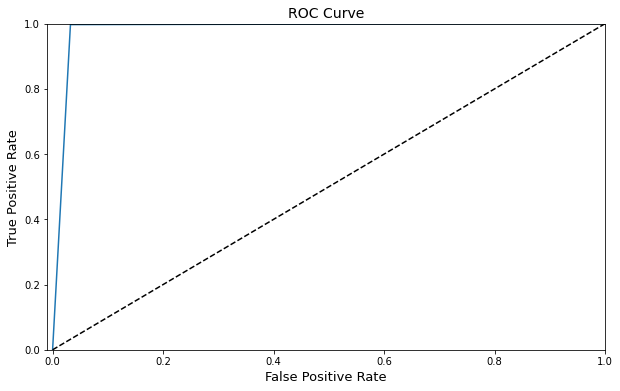

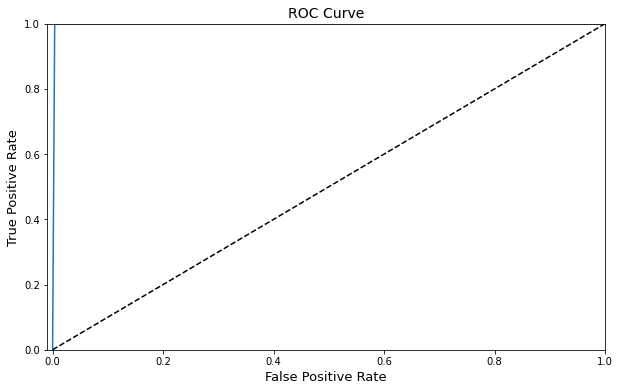

In [89]:
rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test_oversampled, rf_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, rf_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test, rf_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

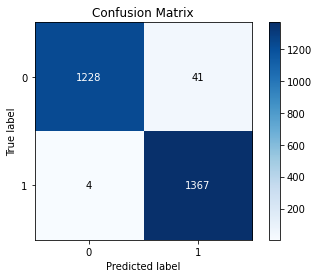

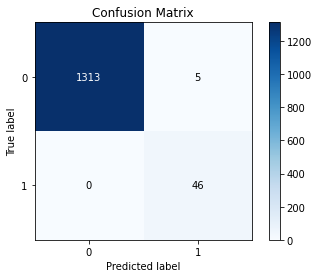

In [90]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, rf_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_oversampled_pred_class_original)

#Importância de cada feature (de acordo com a random forest)

In [91]:
importances = pd.DataFrame({'feature':x_train_oversampled.columns,'importance':np.round(rf_oversampled.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances.transpose()
importances

feature      Continuous interest rate (after tax)  ...   Net Income Flag
importance                                  0.094  ...               0.0

[1 rows x 95 columns]

#KNN oversampled

In [92]:
knn_oversampled = KNeighborsClassifier(n_neighbors = 5)

knn_oversampled.fit(x_train_oversampled,y_train_oversampled)
knn_oversampled_pred_class = knn_oversampled.predict(x_test_oversampled)
knn_oversampled_pred_class_original = knn_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, knn_oversampled_pred_class))
print(classification_report(y_test, knn_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1269
           1       0.88      0.98      0.93      1371

    accuracy                           0.92      2640
   macro avg       0.93      0.92      0.92      2640
weighted avg       0.93      0.92      0.92      2640

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1318
           1       0.22      1.00      0.36        46

    accuracy                           0.88      1364
   macro avg       0.61      0.94      0.65      1364
weighted avg       0.97      0.88      0.91      1364



Text(0, 0.5, 'True Positive Rate')

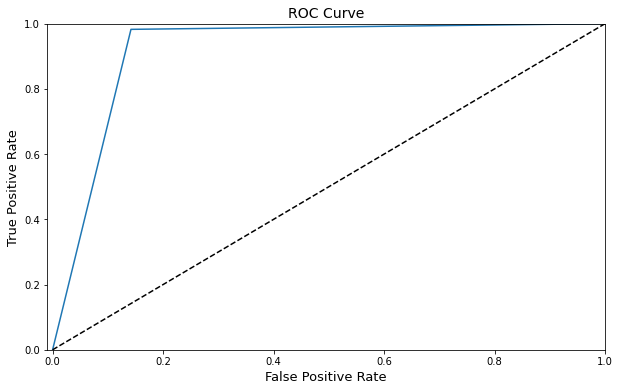

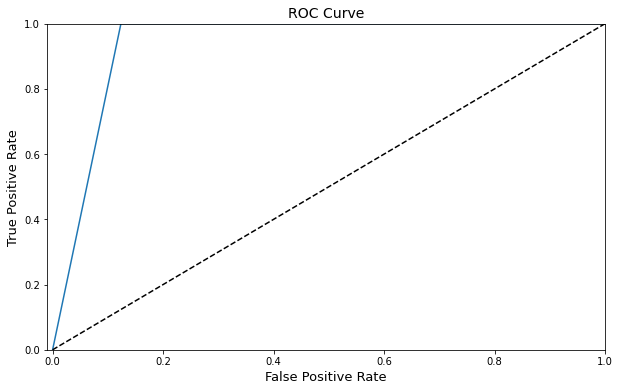

In [93]:
knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test_oversampled, knn_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, knn_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test, knn_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

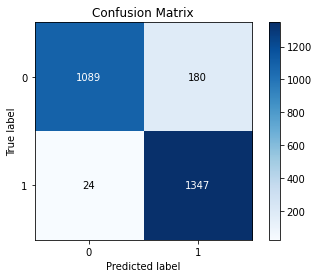

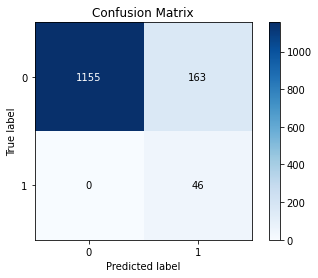

In [94]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, knn_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_oversampled_pred_class_original)

#Neural Network oversampled

In [95]:
mlp_oversampled = MLPClassifier(solver='adam', max_iter=1000, alpha=1e-5, hidden_layer_sizes=(20,20), random_state=1)

mlp_oversampled.fit(x_train_oversampled, y_train_oversampled)
mlp_oversampled_pred_class = mlp_oversampled.predict(x_test_oversampled)
mlp_oversampled_pred_class_original = mlp_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, mlp_oversampled_pred_class))
print(classification_report(y_test, mlp_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.84      0.64      0.72      1269
           1       0.73      0.88      0.80      1371

    accuracy                           0.77      2640
   macro avg       0.78      0.76      0.76      2640
weighted avg       0.78      0.77      0.76      2640

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1318
           1       0.08      0.87      0.15        46

    accuracy                           0.67      1364
   macro avg       0.54      0.76      0.47      1364
weighted avg       0.96      0.67      0.77      1364



Text(0, 0.5, 'True Positive Rate')

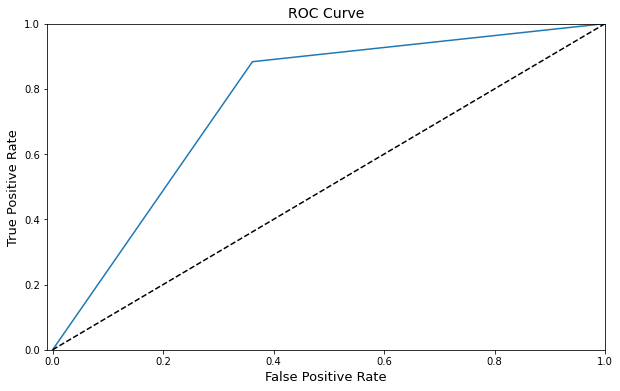

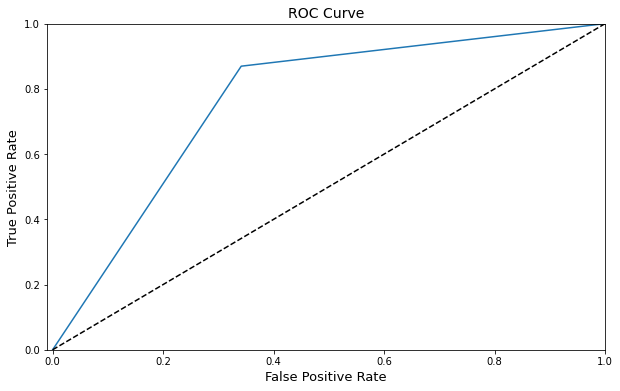

In [96]:
mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test_oversampled, mlp_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='mlp_oversampled Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, mlp_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test, mlp_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='mlp_oversampled Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

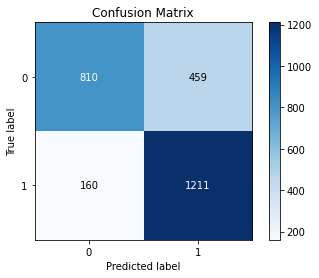

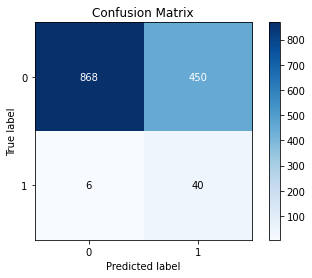

In [97]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, mlp_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_oversampled_pred_class_original)


#XGBoost tuning with sherpa + SMOTE

In [98]:
parameters_xgb = [sherpa.Continuous('learning_rate', [0.01, 0.1]),
              sherpa.Discrete('max_depth', [3, 10]),
              sherpa.Discrete('min_child_weight', [1, 5]),
              sherpa.Continuous('subsample', [0.5, 0.7]),
              sherpa.Continuous('colsample_bytree', [0.5, 0.7]),
              sherpa.Discrete('n_estimators', [100, 500]),]

algorithm_xgb = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [99]:
study_xgb = sherpa.Study(parameters=parameters_xgb,
                     algorithm=algorithm_xgb,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8887 if on a cluster or
http://localhost:8887 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [100]:
for trial in study_xgb:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    xgb = XGBClassifier(learning_rate=trial.parameters['learning_rate'],
                                 max_depth=int(trial.parameters['max_depth']),
                                 min_child_weight=int(trial.parameters['min_child_weight']),
                                 subsample=trial.parameters['subsample'],
                                 colsample_bytree=trial.parameters['colsample_bytree'],
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 objective= 'reg:squarederror')
    
    xgb.fit(x_train_oversampled2, y_train_oversampled2)
    xgb_pred_class = xgb.predict(x_test_oversampled2)

    xgb_f1 = f1_score(y_test_oversampled2, xgb_pred_class)

    print("F1 score: ", xgb_f1)
    study_xgb.add_observation(trial, iteration=1, objective=xgb_f1)
    study_xgb.finalize(trial)
print(study_xgb.get_best_result())




Trial  1  with parameters  {'learning_rate': 0.025909538641343897, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.5343255651358471, 'colsample_bytree': 0.6405385518885922, 'n_estimators': 312}
F1 score:  0.9803094233473981
Trial  2  with parameters  {'learning_rate': 0.06407057988728967, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5312141647657048, 'colsample_bytree': 0.6475374455964953, 'n_estimators': 430}
F1 score:  0.9859154929577464
Trial  3  with parameters  {'learning_rate': 0.09736576322782974, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.6886724969345659, 'colsample_bytree': 0.5979528846093525, 'n_estimators': 424}
F1 score:  0.9803370786516855
Trial  4  with parameters  {'learning_rate': 0.05693439609859762, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6960571746485598, 'colsample_bytree': 0.6364227557987916, 'n_estimators': 381}
F1 score:  0.9866291344123856
Trial  5  with parameters  {'learning_rate': 0.037854759788947694, 'max_depth': 5, 

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9803370786516855
Trial  8  with parameters  {'learning_rate': 0.07504285017305773, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.5038959279725792, 'colsample_bytree': 0.5698438799363658, 'n_estimators': 158.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.989399293286219
Trial  9  with parameters  {'learning_rate': 0.07597870681851632, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.5, 'colsample_bytree': 0.572896515249461, 'n_estimators': 158.0}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9866102889358703
Trial  10  with parameters  {'learning_rate': 0.05620087880075451, 'max_depth': 9.0, 'min_child_weight': 2.0, 'subsample': 0.5822665023305594, 'colsample_bytree': 0.5087441725803247, 'n_estimators': 158.0}
F1 score:  0.9880028228652082
{'Trial-ID': 6, 'Iteration': 1, 'colsample_bytree': 0.5698439239175921, 'learning_rate': 0.0750428457346827, 'max_depth': 9.0, 'min_child_weight': 2.0, 'n_estimators': 158.0, 'subsample': 0.5038952640713349, 'Objective': 0.989399293286219}


In [101]:
xgb_oversampled = XGBClassifier(learning_rate=0.0750428457346827,
                                 max_depth=9,
                                 min_child_weight=2,
                                 subsample=0.5038952640713349,
                                 colsample_bytree=0.5698439239175921,
                                 n_estimators=158,
                                 objective= 'reg:squarederror')

xgb_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
xgb_oversampled_pred_class = xgb_oversampled.predict(x_test_oversampled2)
xgb_oversampled_pred_class_val = xgb_oversampled.predict(x_validation_oversampled)
xgb_oversampled_pred_class_original = xgb_oversampled.predict(x_test)

print(classification_report(y_test_oversampled2, xgb_oversampled_pred_class))
print(classification_report(y_validation_oversampled, xgb_oversampled_pred_class_val))
print(classification_report(y_test, xgb_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       619
           1       0.98      1.00      0.99       701

    accuracy                           0.99      1320
   macro avg       0.99      0.99      0.99      1320
weighted avg       0.99      0.99      0.99      1320

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       650
           1       0.97      0.99      0.98       670

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       0.92      1.00      0.96        46

    accuracy                           1.00      1364
   macro avg       0.96      1.00      0.98      1364
weighted avg       1.00      1.00      1.00      1364



Text(0, 0.5, 'True Positive Rate')

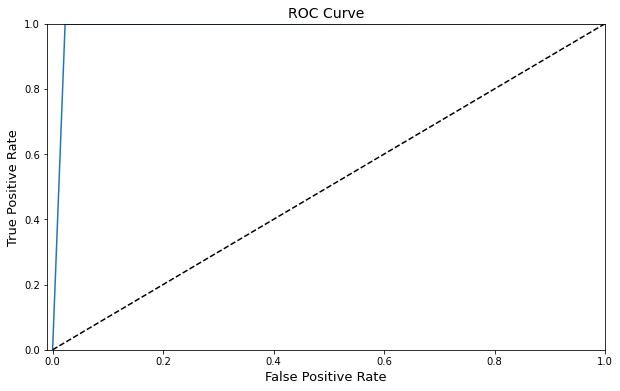

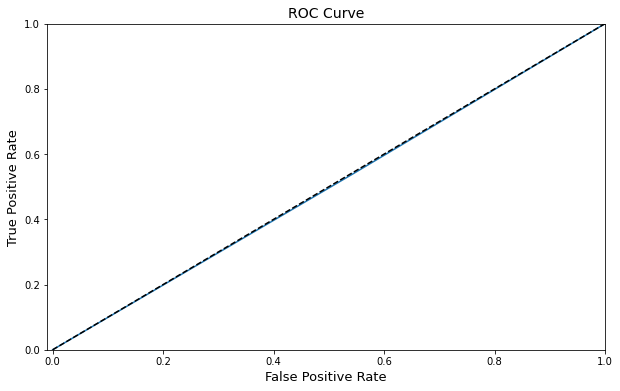

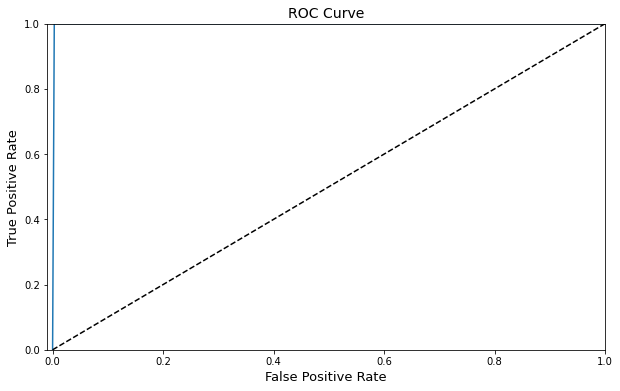

In [102]:
xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test_oversampled2, xgb_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, xgb_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_validation_oversampled, xgb_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, xgb_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test, xgb_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

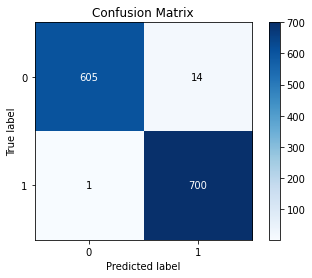

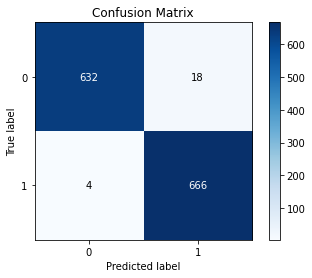

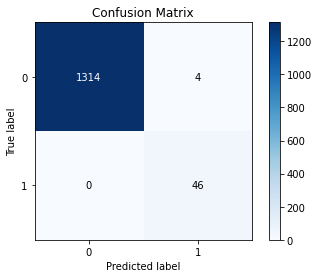

In [104]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, xgb_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, xgb_oversampled_pred_class_val)
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_oversampled_pred_class_original)

#SVM tuning with sherpa + SMOTE

In [105]:
parameters_svc = [sherpa.Continuous('C', [0.1, 1]),
              sherpa.Continuous('gamma', [1, 0.001]),
              sherpa.Choice('class_weight', ['balanced', None])]

algorithm_svc = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [106]:
study_svc = sherpa.Study(parameters=parameters_svc,
                     algorithm=algorithm_svc,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8888 if on a cluster or
http://localhost:8888 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [107]:
for trial in study_svc:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    svc = SVC(C=trial.parameters['C'],
                                 gamma=trial.parameters['gamma'],
                                 kernel = 'rbf',
                                 class_weight=trial.parameters['class_weight'])
    
    svc.fit(x_train_oversampled2, y_train_oversampled2)
    svc_pred_class = svc.predict(x_test_oversampled2)

    svc_f1 = f1_score(y_test_oversampled2, svc_pred_class)

    print("F1 score: ", svc_f1)
    study_svc.add_observation(trial, iteration=1, objective=svc_f1)
    study_svc.finalize(trial)
print(study_svc.get_best_result())




Trial  1  with parameters  {'C': 0.532544726818931, 'gamma': 0.6021382661526773, 'class_weight': None}
F1 score:  0.0
Trial  2  with parameters  {'C': 0.26327891633878675, 'gamma': 0.9716815000923822, 'class_weight': 'balanced'}
F1 score:  0.695436507936508
Trial  3  with parameters  {'C': 0.7337491692134417, 'gamma': 0.942770799579947, 'class_weight': 'balanced'}
F1 score:  0.6989032901296113
Trial  4  with parameters  {'C': 0.9908528439665205, 'gamma': 0.09156263974447809, 'class_weight': None}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  5  with parameters  {'C': 0.5121956188384609, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6961271102284011
Trial  6  with parameters  {'C': 0.11520150873021093, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  7  with parameters  {'C': 0.11171088274151447, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  8  with parameters  {'C': 0.32143590512064707, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  9  with parameters  {'C': 0.9943896363021792, 'gamma': 1.0, 'class_weight': 'balanced'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6989032901296113
Trial  10  with parameters  {'C': 0.9833289375628477, 'gamma': 1.0, 'class_weight': 'balanced'}
F1 score:  0.6989032901296113
{'Trial-ID': 3, 'Iteration': 1, 'C': 0.7337491692134417, 'class_weight': 'balanced', 'gamma': 0.942770799579947, 'Objective': 0.6989032901296113}


In [108]:
svc_oversampled = SVC(C=0.7337491692134417,
                                 class_weight='balanced',
                                 gamma=0.942770799579947,
                                 kernel='rbf')

svc_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
svc_oversampled_pred_class = svc_oversampled.predict(x_test_oversampled2)
svc_oversampled_pred_class_val = svc_oversampled.predict(x_validation_oversampled)
svc_oversampled_pred_class_original = svc_oversampled.predict(x_test)

print(classification_report(y_test_oversampled2, svc_oversampled_pred_class))
print(classification_report(y_validation_oversampled, svc_oversampled_pred_class_val))
print(classification_report(y_test, svc_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05       619
           1       0.54      1.00      0.70       701

    accuracy                           0.54      1320
   macro avg       0.77      0.51      0.37      1320
weighted avg       0.75      0.54      0.39      1320

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       650
           1       0.52      1.00      0.68       670

    accuracy                           0.52      1320
   macro avg       0.76      0.52      0.37      1320
weighted avg       0.75      0.52      0.38      1320

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      1318
           1       0.12      1.00      0.22        46

    accuracy                           0.76      1364
   macro avg       0.56      0.88      0.54      1364
weighted avg       0.97      0.76      0.84      1364



Text(0, 0.5, 'True Positive Rate')

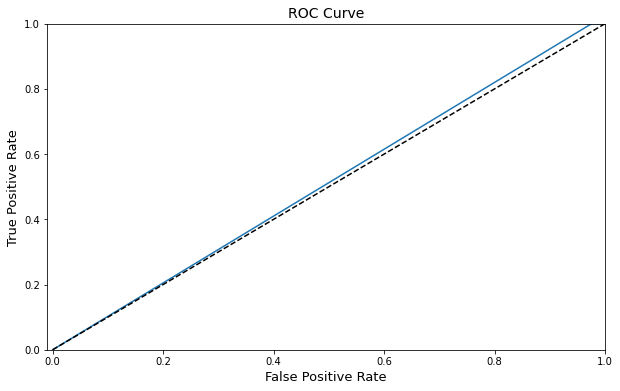

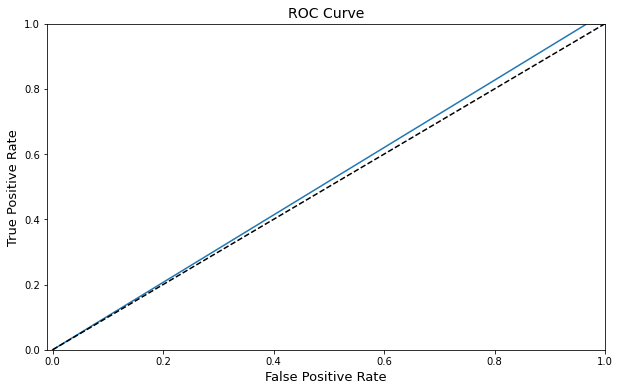

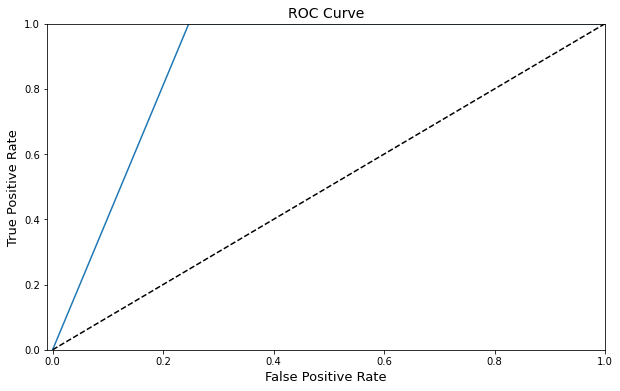

In [109]:
svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test_oversampled2, svc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, svc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_validation_oversampled, svc_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, svc_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test, svc_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

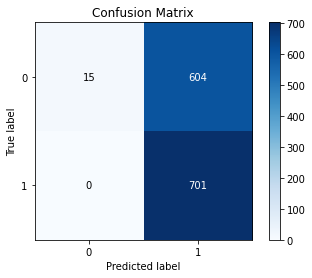

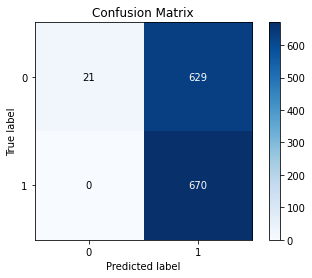

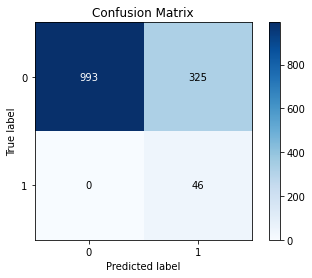

In [110]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, svc_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, svc_oversampled_pred_class_val)
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_oversampled_pred_class_original)

#Random Forest tuning with sherpa + SMOTE

In [111]:
parameters_rf = [sherpa.Discrete('max_depth', [10, 100]),
              sherpa.Choice('max_features', ['auto', 'sqrt']),
              sherpa.Discrete('min_samples_leaf', [1, 4]),
              sherpa.Discrete('min_samples_split', [2, 10]),
              sherpa.Discrete('n_estimators', [200, 2000]),
              sherpa.Choice('class_weight', ['balanced', None]),
              sherpa.Choice('criterion', ['gini', 'entropy'])]

algorithm_rf = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [112]:
study_rf = sherpa.Study(parameters=parameters_rf,
                     algorithm=algorithm_rf,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8889 if on a cluster or
http://localhost:8889 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [113]:
for trial in study_rf:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    rf = RandomForestClassifier(max_depth=int(trial.parameters['max_depth']),
                                 max_features=trial.parameters['max_features'],
                                 min_samples_leaf=int(trial.parameters['min_samples_leaf']),
                                 min_samples_split=int(trial.parameters['min_samples_split']),
                                 n_estimators=int(trial.parameters['n_estimators']),
                                 class_weight=trial.parameters['class_weight'],
                                 criterion=trial.parameters['criterion'])
    
    rf.fit(x_train_oversampled2, y_train_oversampled2)
    rf_pred_class = rf.predict(x_test_oversampled2)

    rf_f1 = f1_score(y_test_oversampled2, rf_pred_class)

    print("F1 score: ", rf_f1)
    study_rf.add_observation(trial, iteration=1, objective=rf_f1)
    study_rf.finalize(trial)
print(study_rf.get_best_result())




Trial  1  with parameters  {'max_depth': 31, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 865, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.9859154929577464
Trial  2  with parameters  {'max_depth': 44, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 1047, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.9838369641602248
Trial  3  with parameters  {'max_depth': 99, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1978, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.9866102889358703
Trial  4  with parameters  {'max_depth': 65, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 629, 'class_weight': 'balanced', 'criterion': 'entropy'}
F1 score:  0.9824561403508771
Trial  5  with parameters  {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators':

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9831460674157303
Trial  9  with parameters  {'max_depth': 91, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 1099, 'class_weight': 'balanced', 'criterion': 'gini'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9873060648801127
Trial  10  with parameters  {'max_depth': 91, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 1099, 'class_weight': 'balanced', 'criterion': 'gini'}
F1 score:  0.9866102889358703
{'Trial-ID': 9, 'Iteration': 1, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 91, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 1099, 'Objective': 0.9873060648801127}


In [114]:
rf_oversampled = RandomForestClassifier(max_depth=91,
                                 max_features='auto',
                                 min_samples_leaf=1,
                                 min_samples_split=7,
                                 n_estimators=1099,
                                 class_weight='balanced',
                                 criterion='gini')

rf_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
rf_oversampled_pred_class = rf_oversampled.predict(x_test_oversampled2)
rf_oversampled_pred_class_val = rf_oversampled.predict(x_validation_oversampled)
rf_oversampled_pred_class_original = rf_oversampled.predict(x_test)

print(classification_report(y_test_oversampled2, rf_oversampled_pred_class))
print(classification_report(y_validation_oversampled, rf_oversampled_pred_class_val))
print(classification_report(y_test, rf_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       619
           1       0.97      1.00      0.99       701

    accuracy                           0.99      1320
   macro avg       0.99      0.98      0.99      1320
weighted avg       0.99      0.99      0.99      1320

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       650
           1       0.97      1.00      0.98       670

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       0.92      1.00      0.96        46

    accuracy                           1.00      1364
   macro avg       0.96      1.00      0.98      1364
weighted avg       1.00      1.00      1.00      1364



Text(0, 0.5, 'True Positive Rate')

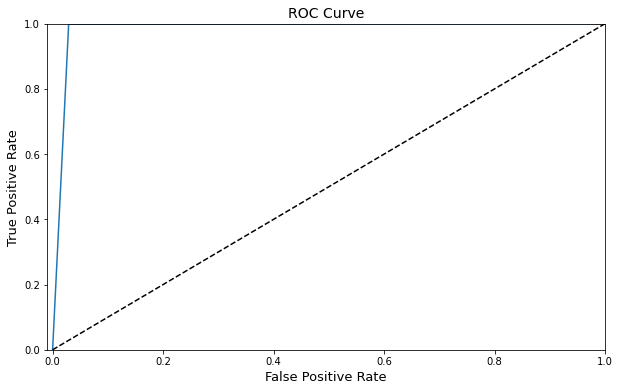

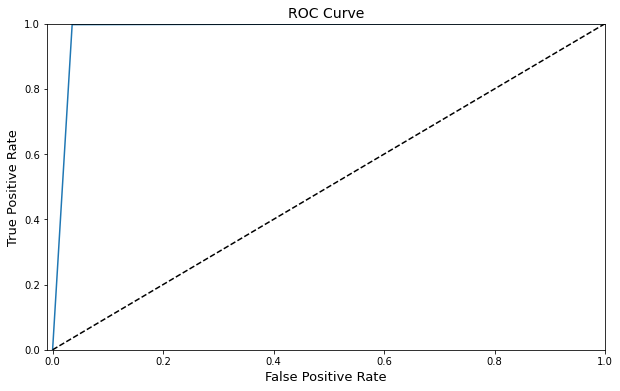

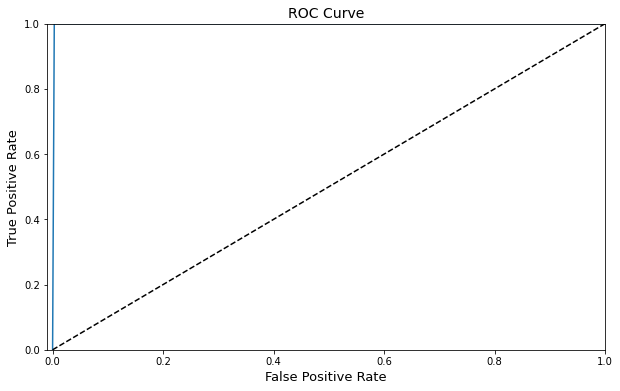

In [117]:
rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test_oversampled2, rf_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, rf_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_validation_oversampled, rf_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, rf_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test, rf_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

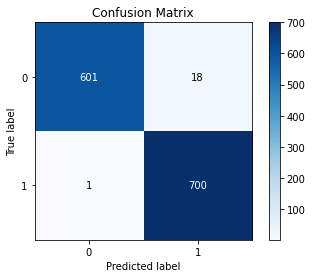

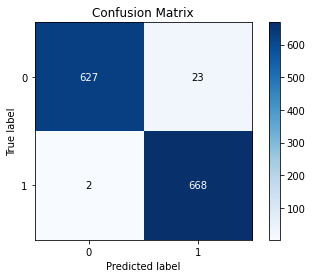

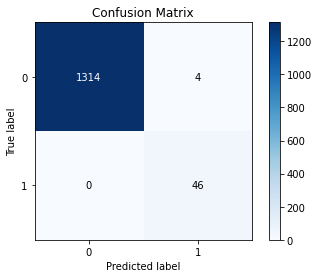

In [118]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, rf_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, rf_oversampled_pred_class_val)
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_oversampled_pred_class_original)

#KNN tuning with sherpa + SMOTE

In [119]:
parameters_knn = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute']),
              sherpa.Choice('weights', ['uniform', 'distance'])]

algorithm_knn = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [120]:
study_knn = sherpa.Study(parameters=parameters_knn,
                     algorithm=algorithm_knn,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8890 if on a cluster or
http://localhost:8890 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [121]:
for trial in study_knn:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
                                 leaf_size=int(trial.parameters['leaf_size']),
                                 algorithm=trial.parameters['algorithm'],
                                 weights=trial.parameters['weights'])
    knn.fit(x_train_oversampled2, y_train_oversampled2)
    knn_pred_class = knn.predict(x_test_oversampled2)

    knn_f1 = f1_score(y_test_oversampled2, knn_pred_class)

    print("F1 score: ", knn_f1)
    study_knn.add_observation(trial, iteration=1, objective=knn_f1)
    study_knn.finalize(trial)
print(study_knn.get_best_result())




Trial  1  with parameters  {'n_neighbors': 4, 'leaf_size': 46, 'algorithm': 'kd_tree', 'weights': 'distance'}
F1 score:  0.9456521739130435
Trial  2  with parameters  {'n_neighbors': 6, 'leaf_size': 45, 'algorithm': 'kd_tree', 'weights': 'uniform'}
F1 score:  0.9322493224932249
Trial  3  with parameters  {'n_neighbors': 3, 'leaf_size': 23, 'algorithm': 'kd_tree', 'weights': 'distance'}
F1 score:  0.9461486025903203
Trial  4  with parameters  {'n_neighbors': 5, 'leaf_size': 27, 'algorithm': 'kd_tree', 'weights': 'uniform'}
F1 score:  0.9294828744123572
Trial  5  with parameters  {'n_neighbors': 14, 'leaf_size': 23, 'algorithm': 'ball_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9205298013245033
Trial  6  with parameters  {'n_neighbors': 3, 'leaf_size': 23, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9461486025903203
Trial  7  with parameters  {'n_neighbors': 3, 'leaf_size': 21, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9461486025903203
Trial  8  with parameters  {'n_neighbors': 3, 'leaf_size': 48, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9461486025903203
Trial  9  with parameters  {'n_neighbors': 3, 'leaf_size': 21, 'algorithm': 'kd_tree', 'weights': 'distance'}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.9461486025903203
Trial  10  with parameters  {'n_neighbors': 3, 'leaf_size': 46, 'algorithm': 'brute', 'weights': 'distance'}
F1 score:  0.9461486025903203
{'Trial-ID': 3, 'Iteration': 1, 'algorithm': 'kd_tree', 'leaf_size': 23, 'n_neighbors': 3, 'weights': 'distance', 'Objective': 0.9461486025903203}


In [122]:
knn_oversampled = KNeighborsClassifier(n_neighbors=3,
                                 leaf_size=23,
                                 algorithm='kd_tree',
                                 weights='distance')

knn_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
knn_oversampled_pred_class = knn_oversampled.predict(x_test_oversampled2)
knn_oversampled_pred_class_val = knn_oversampled.predict(x_validation_oversampled)
knn_oversampled_pred_class_original = knn_oversampled.predict(x_test)

print(classification_report(y_test_oversampled2, knn_oversampled_pred_class))
print(classification_report(y_validation_oversampled, knn_oversampled_pred_class_val))
print(classification_report(y_test, knn_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       619
           1       0.91      0.99      0.95       701

    accuracy                           0.94      1320
   macro avg       0.95      0.94      0.94      1320
weighted avg       0.94      0.94      0.94      1320

              precision    recall  f1-score   support

           0       0.98      0.89      0.94       650
           1       0.91      0.99      0.94       670

    accuracy                           0.94      1320
   macro avg       0.95      0.94      0.94      1320
weighted avg       0.94      0.94      0.94      1320

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1318
           1       0.56      1.00      0.72        46

    accuracy                           0.97      1364
   macro avg       0.78      0.99      0.85      1364
weighted avg       0.99      0.97      0.98      1364



Text(0, 0.5, 'True Positive Rate')

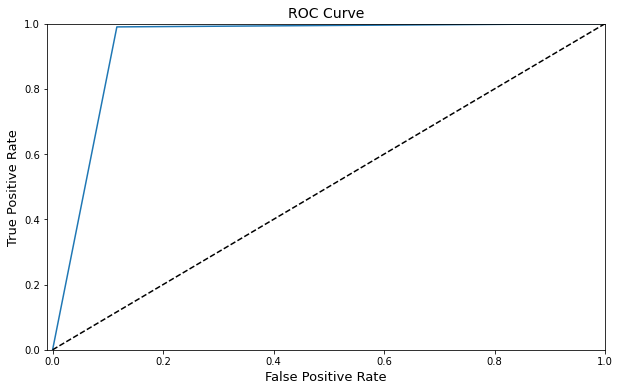

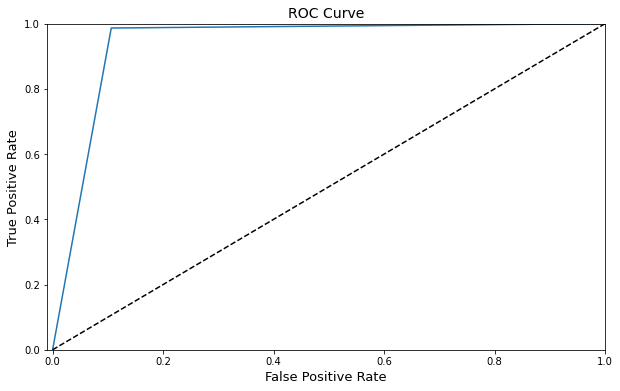

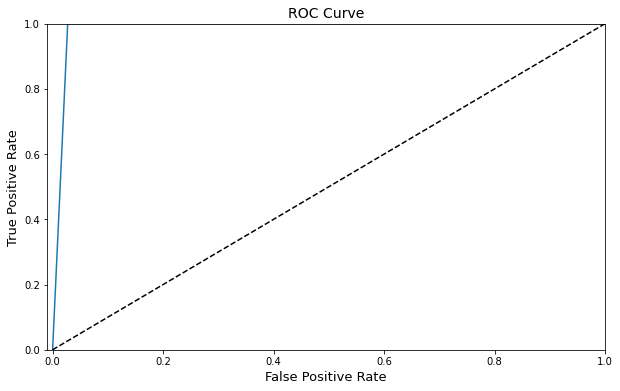

In [123]:
knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test_oversampled2, knn_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, knn_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_validation_oversampled, knn_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, knn_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test, knn_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

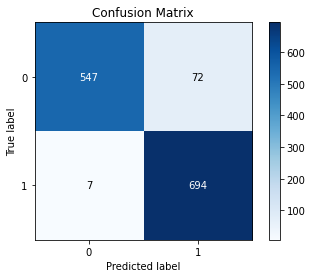

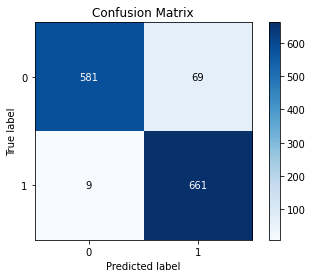

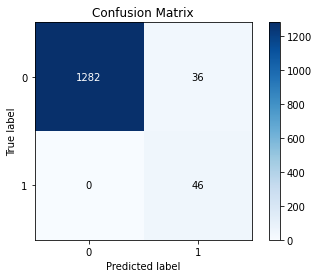

In [124]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, knn_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, knn_oversampled_pred_class_val)
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_oversampled_pred_class_original)

#Neural Network tuning with sherpa + SMOTE

In [128]:
parameters_mlp = [sherpa.Discrete('hidden_layer_sizes', [20, 200]),
                  sherpa.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
                  sherpa.Choice('solver', ['lbfgs', 'sgd', 'adam']),
                  sherpa.Continuous('alpha', [0.00001, 0.25]),
                  sherpa.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
                  sherpa.Continuous('learning_rate_init', [0.0001, 0.25]),
                  sherpa.Discrete('max_iter', [1, 400]),
                  sherpa.Choice('shuffle', [True, False]),
                  sherpa.Continuous('momentum', [0.9, 0.01])]

algorithm_mlp = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=100)

In [129]:
study_mlp = sherpa.Study(parameters=parameters_mlp,
                     algorithm=algorithm_mlp,
                     lower_is_better=False)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8892 if on a cluster or
http://localhost:8892 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [130]:
for trial in study_mlp:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    mlp = MLPClassifier(hidden_layer_sizes=(int(trial.parameters['hidden_layer_sizes'])),
                        activation=trial.parameters['activation'],
                        solver=trial.parameters['solver'],
                        alpha=trial.parameters['alpha'],
                        learning_rate=trial.parameters['learning_rate'],
                        learning_rate_init=trial.parameters['learning_rate_init'],
                        max_iter=trial.parameters['max_iter'],
                        shuffle=trial.parameters['shuffle'],
                        momentum=trial.parameters['momentum'])
    
    mlp.fit(x_train_oversampled2, y_train_oversampled2)
    mlp_pred_class = mlp.predict(x_test_oversampled2)

    mlp_f1 = f1_score(y_test_oversampled2, mlp_pred_class)

    print("F1 score: ", mlp_f1)
    study_mlp.add_observation(trial, iteration=1, objective=mlp_f1)
    study_mlp.finalize(trial)
print(study_mlp.get_best_result())

Trial  1  with parameters  {'hidden_layer_sizes': 99, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.16357412886672584, 'learning_rate': 'adaptive', 'learning_rate_init': 0.008192245333827012, 'max_iter': 38, 'shuffle': True, 'momentum': 0.6927399603187001}
F1 score:  0.7116654438738078
Trial  2  with parameters  {'hidden_layer_sizes': 142, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.16803909870604294, 'learning_rate': 'constant', 'learning_rate_init': 0.05148011225266452, 'max_iter': 57, 'shuffle': True, 'momentum': 0.10955816517300221}
F1 score:  0.6634304207119741
Trial  3  with parameters  {'hidden_layer_sizes': 21, 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.18163794581386086, 'learning_rate': 'adaptive', 'learning_rate_init': 0.16115033047703353, 'max_iter': 296, 'shuffle': False, 'momentum': 0.647671392666654}
F1 score:  0.18222222222222223
Trial  4  with parameters  {'hidden_layer_sizes': 191, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.184113506

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  11  with parameters  {'hidden_layer_sizes': 191, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.23564049993699918, 'learning_rate': 'adaptive', 'learning_rate_init': 0.028723160280685965, 'max_iter': 230, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7463556851311953
Trial  12  with parameters  {'hidden_layer_sizes': 192, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.19216464627948326, 'learning_rate': 'constant', 'learning_rate_init': 0.060687819538834974, 'max_iter': 232, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7598072952512043
Trial  13  with parameters  {'hidden_layer_sizes': 194, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.01763800839748254, 'learning_rate': 'constant', 'learning_rate_init': 0.10400828961214992, 'max_iter': 231, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7456647398843931
Trial  14  with parameters  {'hidden_layer_sizes': 194, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.15276081539346106, 'learning_rate': 'constant', 'learning_rate_init': 0.23071902417320872, 'max_iter': 228, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7440860215053764
Trial  15  with parameters  {'hidden_layer_sizes': 196, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.04020658495006748, 'learning_rate': 'adaptive', 'learning_rate_init': 0.04504002672463189, 'max_iter': 229, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.5117528542646071
Trial  16  with parameters  {'hidden_layer_sizes': 132, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.13562485505410043, 'learning_rate': 'invscaling', 'learning_rate_init': 0.23439819494839295, 'max_iter': 162, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7018050541516245
Trial  17  with parameters  {'hidden_layer_sizes': 188, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.12187406760618001, 'learning_rate': 'constant', 'learning_rate_init': 0.24677750075873492, 'max_iter': 227, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.695436507936508
Trial  18  with parameters  {'hidden_layer_sizes': 130, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.1749751203405077, 'learning_rate': 'invscaling', 'learning_rate_init': 0.09661273388029044, 'max_iter': 152, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.584652862362972
Trial  19  with parameters  {'hidden_layer_sizes': 187, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.08408982866753258, 'learning_rate': 'adaptive', 'learning_rate_init': 0.14069972435291458, 'max_iter': 232, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7321688500727802
Trial  20  with parameters  {'hidden_layer_sizes': 142, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.24167207013798261, 'learning_rate': 'constant', 'learning_rate_init': 0.19503833375469531, 'max_iter': 169, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.5711627906976744
Trial  21  with parameters  {'hidden_layer_sizes': 105, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.08018397243800414, 'learning_rate': 'adaptive', 'learning_rate_init': 0.21921804560022695, 'max_iter': 43, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7229044313934864
Trial  22  with parameters  {'hidden_layer_sizes': 93, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.06779557481064219, 'learning_rate': 'invscaling', 'learning_rate_init': 0.15761820699669735, 'max_iter': 43, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6909090909090909
Trial  23  with parameters  {'hidden_layer_sizes': 106, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.21263870073626098, 'learning_rate': 'invscaling', 'learning_rate_init': 0.24710749036432342, 'max_iter': 37, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7572815533980581
Trial  24  with parameters  {'hidden_layer_sizes': 190, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.19255524556253828, 'learning_rate': 'constant', 'learning_rate_init': 0.24348220395462208, 'max_iter': 231, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7122861586314153
Trial  25  with parameters  {'hidden_layer_sizes': 117, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.11354212998090334, 'learning_rate': 'invscaling', 'learning_rate_init': 0.11005385067715834, 'max_iter': 36, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7041687594173782
Trial  26  with parameters  {'hidden_layer_sizes': 111, 'activation': 'identity', 'solver': 'sgd', 'alpha': 0.10597633458566573, 'learning_rate': 'invscaling', 'learning_rate_init': 0.16737336677689646, 'max_iter': 41, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  27  with parameters  {'hidden_layer_sizes': 99, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01565627524159027, 'learning_rate': 'adaptive', 'learning_rate_init': 0.17207739299823832, 'max_iter': 49, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7160674981658107
Trial  28  with parameters  {'hidden_layer_sizes': 103, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.18649009519850035, 'learning_rate': 'adaptive', 'learning_rate_init': 0.019450976965091328, 'max_iter': 47, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6941431670281996
Trial  29  with parameters  {'hidden_layer_sizes': 100, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.19558425116676645, 'learning_rate': 'invscaling', 'learning_rate_init': 0.02141616156803559, 'max_iter': 45, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6948356807511736
Trial  30  with parameters  {'hidden_layer_sizes': 101, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09545041510720384, 'learning_rate': 'constant', 'learning_rate_init': 0.019899841927895484, 'max_iter': 34, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6708860759493671
Trial  31  with parameters  {'hidden_layer_sizes': 102, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.22454366234227932, 'learning_rate': 'adaptive', 'learning_rate_init': 0.040889695907167886, 'max_iter': 40, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  32  with parameters  {'hidden_layer_sizes': 193, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.23891521844206168, 'learning_rate': 'invscaling', 'learning_rate_init': 0.1692620337084207, 'max_iter': 230, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6135569531795948
Trial  33  with parameters  {'hidden_layer_sizes': 106, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.16308733996691752, 'learning_rate': 'constant', 'learning_rate_init': 0.18938156034187398, 'max_iter': 34, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.5676442762535477
Trial  34  with parameters  {'hidden_layer_sizes': 97, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.03473809543296324, 'learning_rate': 'constant', 'learning_rate_init': 0.041295261577462106, 'max_iter': 46, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7024246877296106
Trial  35  with parameters  {'hidden_layer_sizes': 192, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.10580544308737803, 'learning_rate': 'constant', 'learning_rate_init': 0.03708393454983498, 'max_iter': 233, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6961271102284011
Trial  36  with parameters  {'hidden_layer_sizes': 187, 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.06837273780669066, 'learning_rate': 'adaptive', 'learning_rate_init': 0.22946816331439815, 'max_iter': 233, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.5291943828529195
Trial  37  with parameters  {'hidden_layer_sizes': 131, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0030507494070456794, 'learning_rate': 'adaptive', 'learning_rate_init': 0.17300218092868008, 'max_iter': 160, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.005689900426742532
Trial  38  with parameters  {'hidden_layer_sizes': 190, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.15237327883927823, 'learning_rate': 'adaptive', 'learning_rate_init': 0.07281413037552667, 'max_iter': 232, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7271375464684015
Trial  39  with parameters  {'hidden_layer_sizes': 193, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.035808295316648656, 'learning_rate': 'adaptive', 'learning_rate_init': 0.20802443533137358, 'max_iter': 232, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  40  with parameters  {'hidden_layer_sizes': 188, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.09016846045666506, 'learning_rate': 'constant', 'learning_rate_init': 0.000840359176744256, 'max_iter': 227, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6794185156847742
Trial  41  with parameters  {'hidden_layer_sizes': 91, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.046294337712533454, 'learning_rate': 'invscaling', 'learning_rate_init': 0.12554524107857684, 'max_iter': 45, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6069315300084531
Trial  42  with parameters  {'hidden_layer_sizes': 189, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0402831409040918, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1661861391191523, 'max_iter': 228, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4935834155972359
Trial  43  with parameters  {'hidden_layer_sizes': 187, 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.07922157575129603, 'learning_rate': 'invscaling', 'learning_rate_init': 0.18521526981671343, 'max_iter': 226, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.22198505869797225
Trial  44  with parameters  {'hidden_layer_sizes': 98, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.11482121220062609, 'learning_rate': 'invscaling', 'learning_rate_init': 0.12207197301770593, 'max_iter': 46, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7576323987538941
Trial  45  with parameters  {'hidden_layer_sizes': 98, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.010686387783173898, 'learning_rate': 'constant', 'learning_rate_init': 0.10330017835831841, 'max_iter': 46, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7322780454232622
Trial  46  with parameters  {'hidden_layer_sizes': 95, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.22228565678724282, 'learning_rate': 'invscaling', 'learning_rate_init': 0.2160241108064232, 'max_iter': 46, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6769911504424778
Trial  47  with parameters  {'hidden_layer_sizes': 102, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.04533450104245811, 'learning_rate': 'invscaling', 'learning_rate_init': 0.14547919913547103, 'max_iter': 45, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6656557998483701
Trial  48  with parameters  {'hidden_layer_sizes': 105, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.049657266805859086, 'learning_rate': 'constant', 'learning_rate_init': 0.2419744615795071, 'max_iter': 44, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7059421025901473
Trial  49  with parameters  {'hidden_layer_sizes': 105, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00763174122418985, 'learning_rate': 'adaptive', 'learning_rate_init': 0.041412904773132496, 'max_iter': 45, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6946284032376747
Trial  50  with parameters  {'hidden_layer_sizes': 101, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.12349518947333894, 'learning_rate': 'invscaling', 'learning_rate_init': 0.0783317089304607, 'max_iter': 47, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6945668135095447
Trial  51  with parameters  {'hidden_layer_sizes': 93, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.05674208823302027, 'learning_rate': 'invscaling', 'learning_rate_init': 0.000649824624561262, 'max_iter': 40, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.718135469774217
Trial  52  with parameters  {'hidden_layer_sizes': 191, 'activation': 'identity', 'solver': 'sgd', 'alpha': 0.11131031967883254, 'learning_rate': 'constant', 'learning_rate_init': 0.0525900614146149, 'max_iter': 230, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  53  with parameters  {'hidden_layer_sizes': 106, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.055992321165979436, 'learning_rate': 'constant', 'learning_rate_init': 0.17836946970035483, 'max_iter': 46, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.5275142314990512
Trial  54  with parameters  {'hidden_layer_sizes': 101, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.22571481393997123, 'learning_rate': 'invscaling', 'learning_rate_init': 0.09242610460119656, 'max_iter': 44, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7189349112426037
Trial  55  with parameters  {'hidden_layer_sizes': 92, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.22603516697921067, 'learning_rate': 'invscaling', 'learning_rate_init': 0.14786050214307156, 'max_iter': 40, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6648013430330164
Trial  56  with parameters  {'hidden_layer_sizes': 92, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.14648718678681846, 'learning_rate': 'constant', 'learning_rate_init': 0.001055341540753995, 'max_iter': 47, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.5136186770428016
Trial  57  with parameters  {'hidden_layer_sizes': 95, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.06585403852093968, 'learning_rate': 'constant', 'learning_rate_init': 0.02611611166644268, 'max_iter': 41, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6701337295690937
Trial  58  with parameters  {'hidden_layer_sizes': 102, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.16948606803950364, 'learning_rate': 'constant', 'learning_rate_init': 0.1396311393715137, 'max_iter': 43, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7023895727733526
Trial  59  with parameters  {'hidden_layer_sizes': 99, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.06556285151153766, 'learning_rate': 'constant', 'learning_rate_init': 0.003188051037747537, 'max_iter': 47, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6957816377171216
Trial  60  with parameters  {'hidden_layer_sizes': 95, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.12688413137816346, 'learning_rate': 'adaptive', 'learning_rate_init': 0.03702548434987218, 'max_iter': 48, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.73058884835852
Trial  61  with parameters  {'hidden_layer_sizes': 190, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.00209066880746193, 'learning_rate': 'adaptive', 'learning_rate_init': 0.04413950652021426, 'max_iter': 232, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.3959296947271045
Trial  62  with parameters  {'hidden_layer_sizes': 105, 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.15921950845767668, 'learning_rate': 'adaptive', 'learning_rate_init': 0.19425368677945612, 'max_iter': 52, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.48810437452033767
Trial  63  with parameters  {'hidden_layer_sizes': 102, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.2252915850992987, 'learning_rate': 'adaptive', 'learning_rate_init': 0.2363586057427965, 'max_iter': 48, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.682890855457227
Trial  64  with parameters  {'hidden_layer_sizes': 97, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.19447087311935246, 'learning_rate': 'invscaling', 'learning_rate_init': 0.24372338964626636, 'max_iter': 47, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7160316319194823
Trial  65  with parameters  {'hidden_layer_sizes': 195, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.142834766444991, 'learning_rate': 'constant', 'learning_rate_init': 0.1897457596001832, 'max_iter': 224, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.551789077212806
Trial  66  with parameters  {'hidden_layer_sizes': 192, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.19422226593446146, 'learning_rate': 'constant', 'learning_rate_init': 0.0951073164159998, 'max_iter': 231, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7260774287801315
Trial  67  with parameters  {'hidden_layer_sizes': 106, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.1983524378485255, 'learning_rate': 'adaptive', 'learning_rate_init': 0.24651220876057714, 'max_iter': 44, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7474006116207951
Trial  68  with parameters  {'hidden_layer_sizes': 95, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.22577294400137188, 'learning_rate': 'constant', 'learning_rate_init': 0.0848507806337516, 'max_iter': 42, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7020523708421799
Trial  69  with parameters  {'hidden_layer_sizes': 100, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.09171005850748996, 'learning_rate': 'invscaling', 'learning_rate_init': 0.11183812476012796, 'max_iter': 47, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7167630057803469
Trial  70  with parameters  {'hidden_layer_sizes': 97, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0727300452755483, 'learning_rate': 'invscaling', 'learning_rate_init': 0.24675234809391905, 'max_iter': 45, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.694152923538231
Trial  71  with parameters  {'hidden_layer_sizes': 100, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.17483810134469605, 'learning_rate': 'constant', 'learning_rate_init': 0.2322242693741673, 'max_iter': 49, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.35658914728682173
Trial  72  with parameters  {'hidden_layer_sizes': 116, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.15702533183204717, 'learning_rate': 'invscaling', 'learning_rate_init': 0.0029183560748307796, 'max_iter': 36, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6955645161290323
Trial  73  with parameters  {'hidden_layer_sizes': 119, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.23829471102349467, 'learning_rate': 'invscaling', 'learning_rate_init': 0.07995547176284167, 'max_iter': 34, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  74  with parameters  {'hidden_layer_sizes': 98, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.020767590552994587, 'learning_rate': 'adaptive', 'learning_rate_init': 0.11450773315595063, 'max_iter': 49, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6168224299065421
Trial  75  with parameters  {'hidden_layer_sizes': 91, 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.19978687640857043, 'learning_rate': 'constant', 'learning_rate_init': 0.20987360310502173, 'max_iter': 39, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.48589341692789967
Trial  76  with parameters  {'hidden_layer_sizes': 96, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.24489947180882654, 'learning_rate': 'adaptive', 'learning_rate_init': 0.23177428841221218, 'max_iter': 44, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7117008443908324
Trial  77  with parameters  {'hidden_layer_sizes': 103, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.21937080574051543, 'learning_rate': 'adaptive', 'learning_rate_init': 0.14590278343143165, 'max_iter': 45, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.04178272980501393
Trial  78  with parameters  {'hidden_layer_sizes': 95, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.1288254148636743, 'learning_rate': 'invscaling', 'learning_rate_init': 0.14194838861702194, 'max_iter': 44, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6795827123695976
Trial  79  with parameters  {'hidden_layer_sizes': 96, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.03912740017350731, 'learning_rate': 'invscaling', 'learning_rate_init': 0.12416238273220756, 'max_iter': 47, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7096774193548386
Trial  80  with parameters  {'hidden_layer_sizes': 84, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.11197817525926802, 'learning_rate': 'constant', 'learning_rate_init': 0.08505291354459744, 'max_iter': 92, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6593886462882096
Trial  81  with parameters  {'hidden_layer_sizes': 93, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0523948283003735, 'learning_rate': 'invscaling', 'learning_rate_init': 0.14230175110074644, 'max_iter': 43, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6691339748334567
Trial  82  with parameters  {'hidden_layer_sizes': 96, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.024530638881767947, 'learning_rate': 'constant', 'learning_rate_init': 0.030678642605157368, 'max_iter': 46, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.0
Trial  83  with parameters  {'hidden_layer_sizes': 93, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.1362562254312054, 'learning_rate': 'invscaling', 'learning_rate_init': 0.11364021376455942, 'max_iter': 46, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.41797283176593525
Trial  84  with parameters  {'hidden_layer_sizes': 95, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.165549059985524, 'learning_rate': 'invscaling', 'learning_rate_init': 0.19924407792512255, 'max_iter': 39, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.05006954102920723
Trial  85  with parameters  {'hidden_layer_sizes': 194, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.08980323050092526, 'learning_rate': 'invscaling', 'learning_rate_init': 0.05120930532284281, 'max_iter': 229, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7576197387518142
Trial  86  with parameters  {'hidden_layer_sizes': 96, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.17637303816447764, 'learning_rate': 'adaptive', 'learning_rate_init': 0.20690843785859256, 'max_iter': 43, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.4775143090760425
Trial  87  with parameters  {'hidden_layer_sizes': 93, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.10193860719999737, 'learning_rate': 'constant', 'learning_rate_init': 0.10360433317319852, 'max_iter': 44, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6878787878787879
Trial  88  with parameters  {'hidden_layer_sizes': 83, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.21395796461311653, 'learning_rate': 'adaptive', 'learning_rate_init': 0.13254093880562892, 'max_iter': 92, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.05570291777188329
Trial  89  with parameters  {'hidden_layer_sizes': 97, 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.10325385705294964, 'learning_rate': 'adaptive', 'learning_rate_init': 0.06801913163760427, 'max_iter': 47, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.690560323069157
Trial  90  with parameters  {'hidden_layer_sizes': 104, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.12484302242363665, 'learning_rate': 'adaptive', 'learning_rate_init': 0.15009819653667944, 'max_iter': 47, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6721068249258161
Trial  91  with parameters  {'hidden_layer_sizes': 97, 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.15864993730861154, 'learning_rate': 'adaptive', 'learning_rate_init': 0.07534049739732897, 'max_iter': 43, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7119402985074625
Trial  92  with parameters  {'hidden_layer_sizes': 136, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.10548924548626265, 'learning_rate': 'invscaling', 'learning_rate_init': 0.0588724614750845, 'max_iter': 157, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7102330293819655
Trial  93  with parameters  {'hidden_layer_sizes': 118, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.019586797594769056, 'learning_rate': 'invscaling', 'learning_rate_init': 0.09930818821529741, 'max_iter': 37, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.5717900063251107
Trial  94  with parameters  {'hidden_layer_sizes': 191, 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.14819189598823398, 'learning_rate': 'adaptive', 'learning_rate_init': 0.08746125480912509, 'max_iter': 230, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6388093875214654
Trial  95  with parameters  {'hidden_layer_sizes': 194, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.024957639947352835, 'learning_rate': 'invscaling', 'learning_rate_init': 0.10989823823769755, 'max_iter': 230, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.74981765134938
Trial  96  with parameters  {'hidden_layer_sizes': 95, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.2306230588263969, 'learning_rate': 'adaptive', 'learning_rate_init': 0.04082008770005449, 'max_iter': 43, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7179115300942712
Trial  97  with parameters  {'hidden_layer_sizes': 194, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.06648914648402544, 'learning_rate': 'constant', 'learning_rate_init': 0.08039332984553912, 'max_iter': 231, 'shuffle': False, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.7234352256186318
Trial  98  with parameters  {'hidden_layer_sizes': 106, 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.05000275978467009, 'learning_rate': 'invscaling', 'learning_rate_init': 0.21424511462036638, 'max_iter': 44, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6995581737849779
Trial  99  with parameters  {'hidden_layer_sizes': 94, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.22040475068389614, 'learning_rate': 'invscaling', 'learning_rate_init': 0.21748962370727326, 'max_iter': 44, 'shuffle': True, 'momentum': 0.9}


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


F1 score:  0.6096059113300493
Trial  100  with parameters  {'hidden_layer_sizes': 96, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0009420439913523017, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1524539135137398, 'max_iter': 42, 'shuffle': False, 'momentum': 0.9}
F1 score:  0.6869436201780416
{'Trial-ID': 12, 'Iteration': 1, 'activation': 'logistic', 'alpha': 0.19216464627948326, 'hidden_layer_sizes': 192, 'learning_rate': 'constant', 'learning_rate_init': 0.060687819538834974, 'max_iter': 232, 'momentum': 0.9, 'shuffle': False, 'solver': 'sgd', 'Objective': 0.7598072952512043}


In [131]:
mlp_oversampled = MLPClassifier(hidden_layer_sizes=(192),
                        activation='logistic',
                        solver='sgd',
                        alpha=0.19216464627948326,
                        learning_rate='constant',
                        learning_rate_init=0.060687819538834974,
                        max_iter=232,
                        shuffle=False,
                        momentum=0.9)

mlp_oversampled.fit(x_train_oversampled2,y_train_oversampled2)
mlp_oversampled_pred_class = mlp_oversampled.predict(x_test_oversampled2)
mlp_oversampled_pred_class_val = mlp_oversampled.predict(x_validation_oversampled)
mlp_oversampled_pred_class_original = mlp_oversampled.predict(x_test)

print(classification_report(y_test_oversampled2, mlp_oversampled_pred_class))
print(classification_report(y_validation_oversampled, mlp_oversampled_pred_class_val))
print(classification_report(y_test, mlp_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       619
           1       0.74      0.71      0.72       701

    accuracy                           0.71      1320
   macro avg       0.71      0.71      0.71      1320
weighted avg       0.71      0.71      0.71      1320

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       650
           1       0.72      0.68      0.70       670

    accuracy                           0.71      1320
   macro avg       0.71      0.71      0.71      1320
weighted avg       0.71      0.71      0.71      1320

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1318
           1       0.08      0.74      0.14        46

    accuracy                           0.71      1364
   macro avg       0.53      0.72      0.48      1364
weighted avg       0.96      0.71      0.80      1364



Text(0, 0.5, 'True Positive Rate')

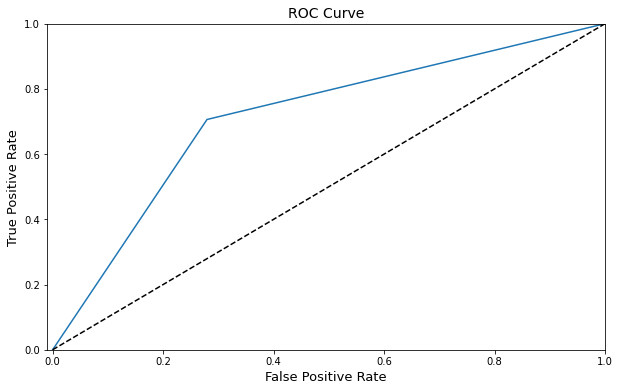

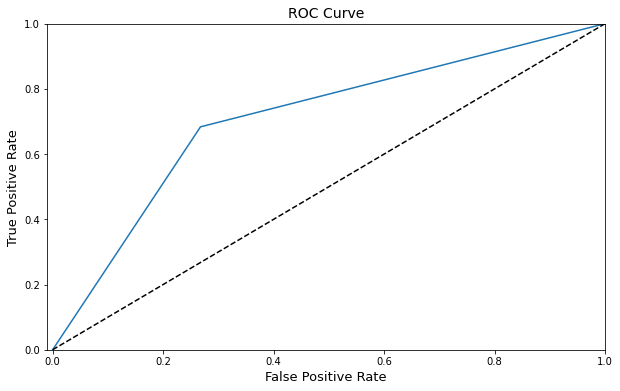

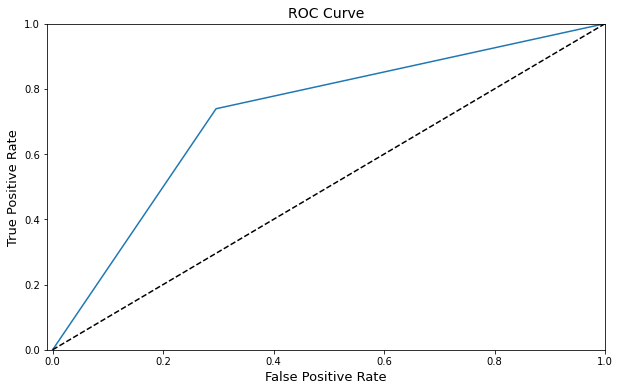

In [132]:
mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test_oversampled2, mlp_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled2, mlp_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)


mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_validation_oversampled, mlp_oversampled_pred_class_val)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_validation_oversampled, mlp_oversampled_pred_class_val)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test, mlp_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

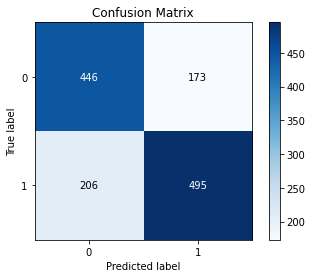

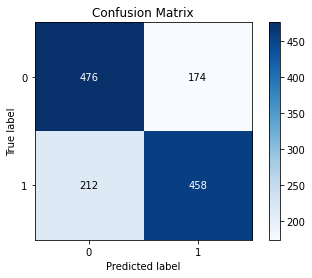

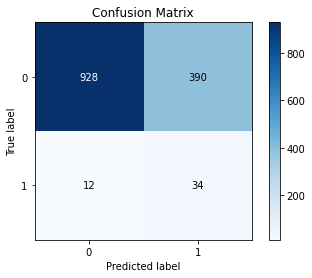

In [133]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled2, mlp_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_validation_oversampled, mlp_oversampled_pred_class_val)
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_oversampled_pred_class_original)

#**A partir daqui somente caixinhas descontinuadas (mantidos por questão de reutilização de codigo e registro de tentativa)**

Balancing data: Undersampling with Tomek Links (descontinuado por não ser útil)

In [ ]:
#undersample = TomekLinks(sampling_strategy='majority')
#x_undersampled, y_undersampled = undersample.fit_resample(x, y)
#x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(x_undersampled, y_undersampled, test_size = 0.2, random_state = 0)

#print('Original dataset shape %s' % Counter(y))
#print('Resampled dataset shape %s' % Counter(y_undersampled))

Visualizações SelectKbest k = 10 (descontinuado por motivo de não gerar nenhum insight)

In [ ]:
# Rodar somente apos criar x e y em "Separação treino/teste"

#from sklearn.feature_selection import SelectKBest, chi2

#sel = SelectKBest(chi2, k=10)
#sel.fit(x, y)
#sel.get_support()

#x_kbest = x[x.columns[sel.get_support(indices=True)]]

In [ ]:
#x_kbest[' Bankrupt?'] = y

In [ ]:
#from IPython.display import Markdown

# `df` already in scope as the pandas dataframe with data

#hue = ' Bankrupt?'
#vars_per_line = 5
#all_vars = list(x_kbest.columns.symmetric_difference([hue]))

#for var in all_vars:
#    rest_vars = list(all_vars)
#    rest_vars.remove(var)
#    display(Markdown(f"## {var}"))
#    while rest_vars:
#        line_vars = rest_vars[:vars_per_line]
#        del rest_vars[:vars_per_line]
#        line_var_names = ", ".join(line_vars)
#        display(Markdown(f"### {var} vs {line_var_names}"))
#        sns.pairplot(x_kbest, x_vars=line_vars, y_vars=[var], hue=hue, palette='bright', )
#        plt.show()
#        plt.close()

Feature selection (descontinuado por motivos de não ser util/piorar significativamente alguns modelos)

In [ ]:
#sel = VarianceThreshold(threshold=0)
#sel.fit(bank_data)
#sel.get_support()


In [ ]:
# Assim percebemos que 'Net Income Flag' é inutil, afinal é uma constant features
# Dito isto, quase TODOS modelos melhoram um pouco (muito pouco), sendo a mlp_oversampled o unico afetado negativamente (de 41 true positives diminui para 31)


# bank_data = bank_data.drop(' Net Income Flag', axis=1)

In [ ]:
# Rodar essa caixinha tira aproximadamente 40 colunas (quase inuteis, por motivos de baixa variancia) do dataset.
# Dito isto, resulta em uma piora pequena de TODOS os modelos, sendo o mlp_oversampled o modelo mais afetado (de 41 true positives diminui para 36)

#sel = VarianceThreshold(threshold=0.001) # 99.9% of observations
#sel.fit(bank_data)
#sel.get_support()
#
#bank_data = bank_data[bank_data.columns[sel.get_support(indices=True)]]
#bank_data

In [ ]:
# Esta Feature selection sofre do mesmo problema do VarianceThreshold anterior, porém o mlp_oversampled é ainda mais afetado (de 41 true positives diminui para 27)
# Deve ser rodado apos criação do x e y em "Separação treino/teste"

#from sklearn.feature_selection import SelectKBest, chi2
#
#sel = SelectKBest(chi2, k=50)
#sel.fit(x, y)
#sel.get_support()
#
#x = x[x.columns[sel.get_support(indices=True)]]

#neural network with keras

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.metrics import roc_auc_score
#import tensorflow as tf

In [ ]:
#model = Sequential()
#model.add(Dense(512, input_dim=95, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
#model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
## Compile model
#model.compile(loss= 'binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [ ]:
#history = model.fit(x_train_oversampled, y_train_oversampled, validation_split=0.33, epochs=1000)



In [ ]:
#history.history

In [ ]:
#plt.plot(history.history[ 'accuracy' ])
#plt.plot(history.history[ 'val_accuracy' ])
#plt.title( 'model auc' )
#plt.ylabel( 'auc' )
#plt.xlabel( 'epoch' )
#plt.legend([ 'train' , 'test' ], loc= 'lower right' )
#plt.show()

In [ ]:
#plt.plot(history.history[ 'loss' ])
#plt.plot(history.history[ 'val_loss' ])
#plt.title( 'model loss' )
#plt.ylabel( 'loss' )
#plt.xlabel( 'epoch' )
#plt.legend([ 'train' , 'test' ], loc= 'upper left' )
#plt.show()

# AutoEncoder

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
bank_data_copy2 = bank_data

In [ ]:
train_labels = y_train.astype(bool)
test_labels = y_test.astype(bool)

In [ ]:
normal_x_train = x_train[~train_labels]
normal_x_test = x_test[~test_labels]

fraud_x_train = x_train[train_labels]
fraud_x_test = x_test[test_labels]

In [ ]:
nb_epoch = 50
batch_size = 64
input_dim = normal_x_train.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

In [ ]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 95)]              0         
                                                                 
 dense (Dense)               (None, 14)                1344      
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [ ]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [ ]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
history = autoencoder.fit(normal_x_train, normal_x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/50
71/83 [========================>.....] - ETA: 0s - loss: 1344067340488146944.0000 - accuracy: 0.1675
Epoch 00001: val_loss did not improve from 1331014350760050688.00000
83/83 [==============================] - 0s 3ms/step - loss: 1349605168240394240.0000 - accuracy: 0.1668 - val_loss: 1331014350760050688.0000 - val_accuracy: 0.2023
Epoch 2/50
74/83 [=========================>....] - ETA: 0s - loss: 1351729424705257472.0000 - accuracy: 0.1305
Epoch 00002: val_loss did not improve from 1331014350760050688.00000
83/83 [==============================] - 0s 3ms/step - loss: 1349605030801440768.0000 - accuracy: 0.1333 - val_loss: 1331014350760050688.0000 - val_accuracy: 0.1276
Epoch 3/50
72/83 [=========================>....] - ETA: 0s - loss: 1344426605912522752.0000 - accuracy: 0.1037
Epoch 00003: val_loss did not improve from 1331014350760050688.00000
83/83 [==============================] - 0s 3ms/step - loss: 1349605168240394240.0000 - accuracy: 0.1040 - val_loss: 1331014350

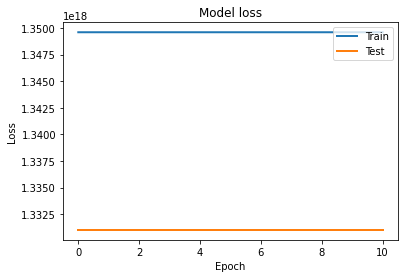

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
threshold_fixed = 50
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

NameError: ignored

In [ ]:
threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))